In [1]:
import os
import pandas as pd
import numpy as np


%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

%cd ..
%pwd

/Users/natapollimpananuwat/Desktop/Projects/Stock-Analytics


'/Users/natapollimpananuwat/Desktop/Projects/Stock-Analytics'

In [3]:
from stock_analytics.config import settings

[2023-10-28 13:03:21,982: INFO: config: Load settings variables from configs; [PosixPath('configs/settings.yaml')]]


In [47]:
com_names = pd.read_parquet("dataset/company_names.parquet")
com_names

,name,company_name_th,company_name_en,market
0,2S,บริษัท 2 เอส เมทัล จำกัด (มหาชน),2S METAL PUBLIC COMPANY LIMITED,SET
1,3K-BAT,บริษัท ไทย เอ็นเนอร์จี สโตเรจ เทคโนโลยี จำกัด ...,THAI ENERGY STORAGE TECHNOLOGY PUBLIC COMPANY ...,SET
2,7UP,บริษัท เซเว่น ยูทิลิตี้ส์ แอนด์ พาวเวอร์ จำกัด...,SEVEN UTILITIES AND POWER PUBLIC COMPANY LIMITED,SET
3,24CS,บริษัท ทเวนตี้ โฟร์ คอน แอนด์ ซัพพลาย จำกัด (ม...,Twenty-Four Con & Supply Public Company Limited,mai
4,A,บริษัท อารียา พรอพเพอร์ตี้ จำกัด (มหาชน),AREEYA PROPERTY PUBLIC COMPANY LIMITED,SET
...,...,...,...,...
866,YGG,บริษัท อิ๊กดราซิล กรุ๊ป จำกัด (มหาชน),YGGDRAZIL GROUP PUBLIC COMPANY LIMITED,mai
867,YONG,บริษัท ยงคอนกรีต จำกัด (มหาชน),Yong Concrete Public Company Limited,mai
868,YUASA,บริษัท ยัวซ่าแบตเตอรี่ ประเทศไทย จำกัด (มหาชน),YUASA BATTERY (THAILAND) PUBLIC COMPANY LIMITED,mai
869,ZEN,บริษัท เซ็น คอร์ปอเรชั่น กรุ๊ป จำกัด (มหาชน),ZEN CORPORATION GROUP PUBLIC COMPANY LIMITED,SET


In [56]:
com_names.value_counts('market')

market
SET    677
mai    194
dtype: int64

In [5]:
st_price = pd.read_csv("dataset/SET_index_historical_price.csv", index_col=0)
st_price

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol,Capital Gains
0,2019-12-16 00:00:00+07:00,1.511037,1.526378,1.511037,1.518708,114333.0,0.0,0.0,2S,NaN
1,2019-12-17 00:00:00+07:00,1.518708,1.526378,1.511038,1.526378,98777.0,0.0,0.0,2S,NaN
2,2019-12-18 00:00:00+07:00,1.526378,1.534048,1.526378,1.534048,112333.0,0.0,0.0,2S,NaN
3,2019-12-19 00:00:00+07:00,1.534048,1.564729,1.526378,1.564729,8888.0,0.0,0.0,2S,NaN
4,2019-12-20 00:00:00+07:00,1.534048,1.549389,1.518708,1.549389,105444.0,0.0,0.0,2S,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+07:00,NaN,18.100000,18.299999,18.100000,18.200001,117824.0,0.0,0.0,WORK,NaN
2022-12-27 00:00:00+07:00,NaN,4.500000,4.500000,4.440000,4.460000,204770.0,0.0,0.0,WP,NaN
2022-12-27 00:00:00+07:00,NaN,3.900000,4.120000,3.880000,4.080000,4767700.0,0.0,0.0,WPH,NaN
2022-12-27 00:00:00+07:00,NaN,1.580000,1.590000,1.490000,1.500000,66936295.0,0.0,0.0,XPG,NaN


In [6]:
st_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461801 entries, 0 to 2022-12-27 00:00:00+07:00
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           461158 non-null  object 
 1   Open           461797 non-null  float64
 2   High           461797 non-null  float64
 3   Low            461797 non-null  float64
 4   Close          461797 non-null  float64
 5   Volume         461797 non-null  float64
 6   Dividends      461801 non-null  float64
 7   Stock Splits   461801 non-null  float64
 8   symbol         461801 non-null  object 
 9   Capital Gains  2 non-null       float64
dtypes: float64(8), object(2)
memory usage: 38.8+ MB


In [12]:
st_price = st_price.dropna(subset=['Date'])
st_price

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol,Capital Gains
0,2019-12-16 00:00:00+07:00,1.511037,1.526378,1.511037,1.518708,114333.0,0.0,0.0,2S,NaN
1,2019-12-17 00:00:00+07:00,1.518708,1.526378,1.511038,1.526378,98777.0,0.0,0.0,2S,NaN
2,2019-12-18 00:00:00+07:00,1.526378,1.534048,1.526378,1.534048,112333.0,0.0,0.0,2S,NaN
3,2019-12-19 00:00:00+07:00,1.534048,1.564729,1.526378,1.564729,8888.0,0.0,0.0,2S,NaN
4,2019-12-20 00:00:00+07:00,1.534048,1.549389,1.518708,1.549389,105444.0,0.0,0.0,2S,NaN
...,...,...,...,...,...,...,...,...,...,...
635,2022-12-27 00:00:00+07:00,18.100000,18.299999,18.100000,18.200001,114124.0,0.0,0.0,WORK,NaN
636,2022-12-27 00:00:00+07:00,4.500000,4.500000,4.440000,4.440000,171960.0,0.0,0.0,WP,NaN
637,2022-12-27 00:00:00+07:00,3.900000,4.120000,3.880000,4.080000,4249300.0,0.0,0.0,WPH,NaN
638,2022-12-27 00:00:00+07:00,1.580000,1.590000,1.500000,1.520000,51143600.0,0.0,0.0,XPG,NaN


In [17]:
temp = st_price.set_index(keys=['Date', 'symbol']).copy()
temp

Open       High        Low      Close  \
Date                      symbol                                               
2019-12-16 00:00:00+07:00 2S       1.511037   1.526378   1.511037   1.518708   
2019-12-17 00:00:00+07:00 2S       1.518708   1.526378   1.511038   1.526378   
2019-12-18 00:00:00+07:00 2S       1.526378   1.534048   1.526378   1.534048   
2019-12-19 00:00:00+07:00 2S       1.534048   1.564729   1.526378   1.564729   
2019-12-20 00:00:00+07:00 2S       1.534048   1.549389   1.518708   1.549389   
...                                     ...        ...        ...        ...   
2022-12-27 00:00:00+07:00 WORK    18.100000  18.299999  18.100000  18.200001   
                          WP       4.500000   4.500000   4.440000   4.440000   
                          WPH      3.900000   4.120000   3.880000   4.080000   
                          XPG      1.580000   1.590000   1.500000   1.520000   
                          ZEN     16.000000  16.900000  15.900000  16.799999   

                                      Volume  Dividends  Stock Splits  \
Date                      symbol                                        
2019-12-16 00:00:00+07:00 2S        114333.0        0.0           0.0   
2019-12-17 00:00:00+07:00 2S         98777.0        0.0           0.0   
2019-12-18 00:00:00+07:00 2S        112333.0        0.0           0.0   
2019-12-19 00:00:00+07:00 2S          8888.0        0.0           0.0   
2019-12-20 00:00:00+07:00 2S        105444.0        0.0           0.0   
...                                      ...        ...           ...   
2022-12-27 00:00:00+07:00 WORK      114124.0        0.0           0.0   
                          WP        171960.0        0.0           0.0   
                          WPH      4249300.0        0.0           0.0   
                          XPG     51143600.0        0.0           0.0   
                          ZEN       869730.0        0.0           0.0   

                                  Capital Gains  
Date                      symbol                 
2019-12-16 00:00:00+07:00 2S                NaN  
2019-12-17 00:00:00+07:00 2S                NaN  
2019-12-18 00:00:00+07:00 2S                NaN  
2019-12-19 00:00:00+07:00 2S                NaN  
2019-12-20 00:00:00+07:00 2S                NaN  
...                                         ...  
2022-12-27 00:00:00+07:00 WORK              NaN  
                          WP                NaN  
                          WPH               NaN  
                          XPG               NaN  
                          ZEN               NaN  

[461158 rows x 8 columns]

In [20]:
temp = temp[['Close', 'Volume']]
temp

Close      Volume
Date                      symbol                       
2019-12-16 00:00:00+07:00 2S       1.518708    114333.0
2019-12-17 00:00:00+07:00 2S       1.526378     98777.0
2019-12-18 00:00:00+07:00 2S       1.534048    112333.0
2019-12-19 00:00:00+07:00 2S       1.564729      8888.0
2019-12-20 00:00:00+07:00 2S       1.549389    105444.0
...                                     ...         ...
2022-12-27 00:00:00+07:00 WORK    18.200001    114124.0
                          WP       4.440000    171960.0
                          WPH      4.080000   4249300.0
                          XPG      1.520000  51143600.0
                          ZEN     16.799999    869730.0

[461158 rows x 2 columns]

In [38]:
temp = temp.reset_index()
temp

,Date,symbol,Close,Volume
0,2019-12-16 00:00:00+07:00,2S,1.518708,114333.0
1,2019-12-17 00:00:00+07:00,2S,1.526378,98777.0
2,2019-12-18 00:00:00+07:00,2S,1.534048,112333.0
3,2019-12-19 00:00:00+07:00,2S,1.564729,8888.0
4,2019-12-20 00:00:00+07:00,2S,1.549389,105444.0
...,...,...,...,...
461153,2022-12-27 00:00:00+07:00,WORK,18.200001,114124.0
461154,2022-12-27 00:00:00+07:00,WP,4.440000,171960.0
461155,2022-12-27 00:00:00+07:00,WPH,4.080000,4249300.0
461156,2022-12-27 00:00:00+07:00,XPG,1.520000,51143600.0


In [40]:
pd.pivot(temp, index='Date', columns=['symbol'], values='Close')

symbol,2S,3K-BAT,7UP,A,AAI,AAV,ABPIF,ACC,ACE,ACG,...,WHAUP,WICE,WIIK,WIN,WORK,WORLD,WP,WPH,XPG,ZEN
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-16 00:00:00+07:00,1.518708,NaN,0.52,6.1131,NaN,2.22,4.56,0.63,4.177079,0.900137,...,4.519948,2.051937,1.160048,0.38,11.850938,0.04238,4.302898,1.736421,0.63,13.001860
2019-12-16 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-17 00:00:00+07:00,1.526378,NaN,0.52,6.1131,NaN,2.14,4.54,0.61,3.980972,0.891398,...,4.435464,2.033616,1.151326,0.38,11.850938,0.04238,4.302898,1.727651,0.63,12.820016
2019-12-17 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-18 00:00:00+07:00,1.534048,NaN,0.51,6.1628,NaN,2.18,4.54,0.61,4.039803,0.900137,...,4.519948,2.051937,1.142604,0.38,12.026506,0.04238,4.345927,1.718881,0.64,12.729094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-14 00:00:00+07:00,2.980000,NaN,0.62,4.9800,7.6,3.04,NaN,1.22,2.680000,1.540000,...,4.000000,10.900000,1.800000,0.99,18.700001,NaN,4.520000,3.900000,1.50,17.700001
2022-12-23 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
from stock_analytics.utils import transform_float64_to_float16

In [54]:
import yfinance as yf
name_bk = "TOPP.BK"
stock = yf.Ticker(name_bk)
df = stock.history(period="1y", interval="1d")
df.shape[0]

246

<Axes: xlabel='Date'>

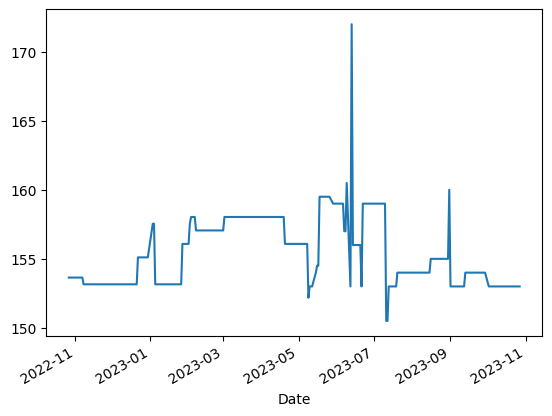

In [50]:
df.Close.plot()

In [55]:
name_bk = "SDF.BK"
stock = yf.Ticker(name_bk)
# df = stock.history(period="1y", interval="1d")

In [73]:
from stock_analytics.ingestion import request_all_history_data_from_yf

In [74]:
all_data = request_all_history_data_from_yf(period='5y', interval='1d')
all_data

  0%|          | 0/677 [00:00<?, ?it/s]

[2023-10-28 13:57:02,137: INFO: ingestion: Download 2S.BK]


  0%|          | 1/677 [00:00<02:55,  3.86it/s]

[2023-10-28 13:57:02,321: INFO: ingestion: Download 3K-BAT.BK]


  0%|          | 2/677 [00:00<02:25,  4.65it/s]

[2023-10-28 13:57:02,540: INFO: ingestion: Download 7UP.BK]


  0%|          | 3/677 [00:00<02:26,  4.61it/s]

[2023-10-28 13:57:02,784: INFO: ingestion: Download A.BK]


  1%|          | 4/677 [00:00<02:33,  4.39it/s]

[2023-10-28 13:57:02,939: INFO: ingestion: Download AAI.BK]


  1%|          | 5/677 [00:01<02:15,  4.97it/s]

[2023-10-28 13:57:03,152: INFO: ingestion: Download AAV.BK]


  1%|          | 6/677 [00:01<02:17,  4.87it/s]

[2023-10-28 13:57:03,381: INFO: ingestion: Download ABPIF.BK]


  1%|          | 7/677 [00:01<02:22,  4.69it/s]

[2023-10-28 13:57:03,607: INFO: ingestion: Download ACC.BK]


  1%|          | 8/677 [00:01<02:25,  4.60it/s]

[2023-10-28 13:57:03,818: INFO: ingestion: Download ACE.BK]


  1%|▏         | 9/677 [00:01<02:23,  4.64it/s]

[2023-10-28 13:57:04,024: INFO: ingestion: Download ACG.BK]


  1%|▏         | 10/677 [00:02<02:21,  4.71it/s]

[2023-10-28 13:57:04,452: INFO: ingestion: Download ADVANC.BK]


  2%|▏         | 11/677 [00:02<03:05,  3.59it/s]

[2023-10-28 13:57:04,885: INFO: ingestion: Download AEONTS.BK]


  2%|▏         | 12/677 [00:03<03:36,  3.07it/s]

[2023-10-28 13:57:05,327: INFO: ingestion: Download AFC.BK]


  2%|▏         | 13/677 [00:03<03:59,  2.77it/s]

[2023-10-28 13:57:05,735: INFO: ingestion: Download AGE.BK]


  2%|▏         | 14/677 [00:03<04:08,  2.67it/s]

[2023-10-28 13:57:06,139: INFO: ingestion: Download AH.BK]


  2%|▏         | 15/677 [00:04<04:13,  2.61it/s]

[2023-10-28 13:57:06,540: INFO: ingestion: Download AHC.BK]


  2%|▏         | 16/677 [00:04<04:17,  2.57it/s]

[2023-10-28 13:57:06,945: INFO: ingestion: Download AI.BK]


  3%|▎         | 17/677 [00:05<04:20,  2.54it/s]

[2023-10-28 13:57:07,312: INFO: ingestion: Download AIE.BK]


  3%|▎         | 18/677 [00:05<04:14,  2.59it/s]

[2023-10-28 13:57:07,677: INFO: ingestion: Download AIMCG.BK]


  3%|▎         | 19/677 [00:05<04:09,  2.63it/s]

[2023-10-28 13:57:08,049: INFO: ingestion: Download AIMIRT.BK]


  3%|▎         | 20/677 [00:06<04:07,  2.65it/s]

[2023-10-28 13:57:08,449: INFO: ingestion: Download AIT.BK]


  3%|▎         | 21/677 [00:06<04:12,  2.60it/s]

[2023-10-28 13:57:08,868: INFO: ingestion: Download AJ.BK]


  3%|▎         | 22/677 [00:06<04:18,  2.53it/s]

[2023-10-28 13:57:09,217: INFO: ingestion: Download AJA.BK]


  3%|▎         | 23/677 [00:07<04:09,  2.63it/s]

[2023-10-28 13:57:09,620: INFO: ingestion: Download AKR.BK]


  4%|▎         | 24/677 [00:07<04:12,  2.58it/s]

[2023-10-28 13:57:09,969: INFO: ingestion: Download ALLA.BK]


  4%|▎         | 25/677 [00:08<04:05,  2.66it/s]

[2023-10-28 13:57:10,329: INFO: ingestion: Download ALLY.BK]


  4%|▍         | 26/677 [00:08<04:01,  2.69it/s]

[2023-10-28 13:57:10,712: INFO: ingestion: Download ALT.BK]


  4%|▍         | 27/677 [00:08<04:03,  2.67it/s]

[2023-10-28 13:57:11,118: INFO: ingestion: Download ALUCON.BK]


  4%|▍         | 28/677 [00:09<04:09,  2.60it/s]

[2023-10-28 13:57:11,493: INFO: ingestion: Download AMANAH.BK]


  4%|▍         | 29/677 [00:09<04:07,  2.62it/s]

[2023-10-28 13:57:11,902: INFO: ingestion: Download AMARIN.BK]


  4%|▍         | 30/677 [00:10<04:12,  2.57it/s]

[2023-10-28 13:57:12,292: INFO: ingestion: Download AMATA.BK]


  5%|▍         | 31/677 [00:10<04:11,  2.57it/s]

[2023-10-28 13:57:12,681: INFO: ingestion: Download AMATAR.BK]


  5%|▍         | 32/677 [00:10<04:11,  2.57it/s]

[2023-10-28 13:57:13,064: INFO: ingestion: Download AMATAV.BK]


  5%|▍         | 33/677 [00:11<04:09,  2.58it/s]

[2023-10-28 13:57:13,453: INFO: ingestion: Download AMC.BK]


  5%|▌         | 34/677 [00:11<04:09,  2.58it/s]

[2023-10-28 13:57:13,800: INFO: ingestion: Download AMR.BK]


  5%|▌         | 35/677 [00:11<04:01,  2.66it/s]

[2023-10-28 13:57:14,156: INFO: ingestion: Download ANAN.BK]


  5%|▌         | 36/677 [00:12<03:57,  2.70it/s]

[2023-10-28 13:57:14,548: INFO: ingestion: Download AOT.BK]


  5%|▌         | 37/677 [00:12<04:00,  2.66it/s]

[2023-10-28 13:57:14,974: INFO: ingestion: Download AP.BK]


  6%|▌         | 38/677 [00:13<04:10,  2.56it/s]

[2023-10-28 13:57:15,348: INFO: ingestion: Download APCO.BK]


  6%|▌         | 39/677 [00:13<04:06,  2.59it/s]

[2023-10-28 13:57:15,704: INFO: ingestion: Download APCS.BK]


  6%|▌         | 40/677 [00:13<04:00,  2.65it/s]

[2023-10-28 13:57:16,054: INFO: ingestion: Download APEX.BK]


  6%|▌         | 41/677 [00:14<03:54,  2.71it/s]

[2023-10-28 13:57:16,473: INFO: ingestion: Download APURE.BK]


  6%|▌         | 42/677 [00:14<04:03,  2.60it/s]

[2023-10-28 13:57:16,777: ERROR: base: AQ.BK: No data found, symbol may be delisted]
[2023-10-28 13:57:16,777: INFO: ingestion: Download AQ.BK]


  6%|▋         | 43/677 [00:14<03:48,  2.78it/s]

[2023-10-28 13:57:17,165: INFO: ingestion: Download AQUA.BK]


  6%|▋         | 44/677 [00:15<03:53,  2.71it/s]

[2023-10-28 13:57:17,547: INFO: ingestion: Download AS.BK]


  7%|▋         | 45/677 [00:15<03:55,  2.69it/s]

[2023-10-28 13:57:17,904: INFO: ingestion: Download ASAP.BK]


  7%|▋         | 46/677 [00:16<03:52,  2.72it/s]

[2023-10-28 13:57:18,277: INFO: ingestion: Download ASEFA.BK]


  7%|▋         | 47/677 [00:16<03:52,  2.71it/s]

[2023-10-28 13:57:18,982: INFO: ingestion: Download ASIA.BK]


  7%|▋         | 48/677 [00:17<04:55,  2.13it/s]

[2023-10-28 13:57:19,412: INFO: ingestion: Download ASIAN.BK]


  7%|▋         | 49/677 [00:17<04:47,  2.18it/s]

[2023-10-28 13:57:19,839: INFO: ingestion: Download ASIMAR.BK]


  7%|▋         | 50/677 [00:17<04:41,  2.23it/s]

[2023-10-28 13:57:20,218: INFO: ingestion: Download ASK.BK]


  8%|▊         | 51/677 [00:18<04:27,  2.34it/s]

[2023-10-28 13:57:20,646: INFO: ingestion: Download ASP.BK]


  8%|▊         | 52/677 [00:18<04:27,  2.34it/s]

[2023-10-28 13:57:21,010: INFO: ingestion: Download ASW.BK]


  8%|▊         | 53/677 [00:19<04:15,  2.45it/s]

[2023-10-28 13:57:21,318: INFO: ingestion: Download AURA.BK]


  8%|▊         | 54/677 [00:19<03:55,  2.64it/s]

[2023-10-28 13:57:21,695: INFO: ingestion: Download AWC.BK]


  8%|▊         | 55/677 [00:19<03:55,  2.65it/s]

[2023-10-28 13:57:22,168: INFO: ingestion: Download AYUD.BK]


  8%|▊         | 56/677 [00:20<04:12,  2.46it/s]

[2023-10-28 13:57:22,536: INFO: ingestion: Download B.BK]


  8%|▊         | 57/677 [00:20<04:04,  2.53it/s]

[2023-10-28 13:57:22,893: INFO: ingestion: Download B-WORK.BK]


  9%|▊         | 58/677 [00:21<03:57,  2.61it/s]

[2023-10-28 13:57:23,281: INFO: ingestion: Download B52.BK]


  9%|▊         | 59/677 [00:21<03:57,  2.60it/s]

[2023-10-28 13:57:23,675: INFO: ingestion: Download BA.BK]


  9%|▉         | 60/677 [00:21<03:59,  2.58it/s]

[2023-10-28 13:57:24,107: INFO: ingestion: Download BAFS.BK]


  9%|▉         | 61/677 [00:22<04:07,  2.49it/s]

[2023-10-28 13:57:24,489: INFO: ingestion: Download BAM.BK]


  9%|▉         | 62/677 [00:22<04:03,  2.53it/s]

[2023-10-28 13:57:24,937: INFO: ingestion: Download BANPU.BK]


  9%|▉         | 63/677 [00:23<04:12,  2.43it/s]

[2023-10-28 13:57:25,247: INFO: ingestion: Download BAREIT.BK]


  9%|▉         | 64/677 [00:23<03:53,  2.63it/s]

[2023-10-28 13:57:25,669: INFO: ingestion: Download BAY.BK]


 10%|▉         | 65/677 [00:23<04:00,  2.54it/s]

[2023-10-28 13:57:26,002: INFO: ingestion: Download BBGI.BK]


 10%|▉         | 66/677 [00:24<03:49,  2.67it/s]

[2023-10-28 13:57:26,416: INFO: ingestion: Download BBL.BK]


 10%|▉         | 67/677 [00:24<03:55,  2.59it/s]

[2023-10-28 13:57:26,807: INFO: ingestion: Download BCH.BK]


 10%|█         | 68/677 [00:24<03:56,  2.58it/s]

[2023-10-28 13:57:27,246: INFO: ingestion: Download BCP.BK]


 10%|█         | 69/677 [00:25<04:05,  2.48it/s]

[2023-10-28 13:57:27,624: INFO: ingestion: Download BCPG.BK]


 10%|█         | 70/677 [00:25<04:00,  2.53it/s]

[2023-10-28 13:57:28,055: INFO: ingestion: Download BCT.BK]


 10%|█         | 71/677 [00:26<04:06,  2.46it/s]

[2023-10-28 13:57:28,481: INFO: ingestion: Download BDMS.BK]


 11%|█         | 72/677 [00:26<04:09,  2.43it/s]

[2023-10-28 13:57:28,863: INFO: ingestion: Download BEAUTY.BK]


 11%|█         | 73/677 [00:26<04:03,  2.48it/s]

[2023-10-28 13:57:29,281: INFO: ingestion: Download BEC.BK]


 11%|█         | 74/677 [00:27<04:05,  2.45it/s]

[2023-10-28 13:57:29,660: INFO: ingestion: Download BEM.BK]


 11%|█         | 75/677 [00:27<04:00,  2.51it/s]

[2023-10-28 13:57:30,067: INFO: ingestion: Download BEYOND.BK]


 11%|█         | 76/677 [00:28<04:01,  2.49it/s]

[2023-10-28 13:57:30,460: INFO: ingestion: Download BGC.BK]


 11%|█▏        | 77/677 [00:28<03:59,  2.51it/s]

[2023-10-28 13:57:30,847: INFO: ingestion: Download BGRIM.BK]


 12%|█▏        | 78/677 [00:28<03:56,  2.53it/s]

[2023-10-28 13:57:31,268: INFO: ingestion: Download BH.BK]


 12%|█▏        | 79/677 [00:29<04:00,  2.48it/s]

[2023-10-28 13:57:31,672: INFO: ingestion: Download BIG.BK]


 12%|█▏        | 80/677 [00:29<04:00,  2.48it/s]

[2023-10-28 13:57:32,050: INFO: ingestion: Download BIOTEC.BK]


 12%|█▏        | 81/677 [00:30<03:55,  2.53it/s]

[2023-10-28 13:57:32,426: INFO: ingestion: Download BIZ.BK]


 12%|█▏        | 82/677 [00:30<03:51,  2.57it/s]

[2023-10-28 13:57:32,833: INFO: ingestion: Download BJC.BK]


 12%|█▏        | 83/677 [00:30<03:54,  2.53it/s]

[2023-10-28 13:57:33,216: INFO: ingestion: Download BJCHI.BK]


 12%|█▏        | 84/677 [00:31<03:52,  2.56it/s]

[2023-10-28 13:57:33,602: INFO: ingestion: Download BKD.BK]


 13%|█▎        | 85/677 [00:31<03:50,  2.56it/s]

[2023-10-28 13:57:34,024: INFO: ingestion: Download BKI.BK]


 13%|█▎        | 86/677 [00:32<03:56,  2.50it/s]

[2023-10-28 13:57:34,407: INFO: ingestion: Download BKKCP.BK]


 13%|█▎        | 87/677 [00:32<03:52,  2.54it/s]

[2023-10-28 13:57:34,827: INFO: ingestion: Download BLA.BK]


 13%|█▎        | 88/677 [00:32<03:56,  2.49it/s]

[2023-10-28 13:57:35,247: INFO: ingestion: Download BLAND.BK]


 13%|█▎        | 89/677 [00:33<03:59,  2.45it/s]

[2023-10-28 13:57:35,596: INFO: ingestion: Download BLISS.BK]


 13%|█▎        | 90/677 [00:33<03:48,  2.56it/s]

[2023-10-28 13:57:35,971: INFO: ingestion: Download BOFFICE.BK]


 13%|█▎        | 91/677 [00:34<03:45,  2.60it/s]

[2023-10-28 13:57:36,389: INFO: ingestion: Download BPP.BK]


 14%|█▎        | 92/677 [00:34<03:51,  2.53it/s]

[2023-10-28 13:57:36,828: INFO: ingestion: Download BR.BK]


 14%|█▎        | 93/677 [00:34<03:58,  2.45it/s]

[2023-10-28 13:57:37,168: INFO: ingestion: Download BRI.BK]


 14%|█▍        | 94/677 [00:35<03:46,  2.58it/s]

[2023-10-28 13:57:37,577: INFO: ingestion: Download BROCK.BK]


 14%|█▍        | 95/677 [00:35<03:49,  2.54it/s]

[2023-10-28 13:57:37,973: INFO: ingestion: Download BRR.BK]


 14%|█▍        | 96/677 [00:36<03:49,  2.53it/s]

[2023-10-28 13:57:38,356: INFO: ingestion: Download BRRGIF.BK]


 14%|█▍        | 97/677 [00:36<03:47,  2.55it/s]

[2023-10-28 13:57:38,758: INFO: ingestion: Download BSBM.BK]


 14%|█▍        | 98/677 [00:36<03:48,  2.54it/s]

[2023-10-28 13:57:39,057: INFO: ingestion: Download BTG.BK]


 15%|█▍        | 99/677 [00:37<03:31,  2.73it/s]

[2023-10-28 13:57:39,469: INFO: ingestion: Download BTNC.BK]


 15%|█▍        | 100/677 [00:37<03:39,  2.63it/s]

[2023-10-28 13:57:40,250: INFO: ingestion: Download BTS.BK]


 15%|█▍        | 101/677 [00:38<04:47,  2.00it/s]

[2023-10-28 13:57:40,580: INFO: ingestion: Download BTSGIF.BK]


 15%|█▌        | 102/677 [00:38<04:18,  2.23it/s]

[2023-10-28 13:57:40,994: INFO: ingestion: Download BUI.BK]


 15%|█▌        | 103/677 [00:39<04:11,  2.28it/s]

[2023-10-28 13:57:41,345: INFO: ingestion: Download BWG.BK]


 15%|█▌        | 104/677 [00:39<03:56,  2.43it/s]

[2023-10-28 13:57:41,682: INFO: ingestion: Download BYD.BK]


 16%|█▌        | 105/677 [00:39<03:42,  2.57it/s]

[2023-10-28 13:57:42,041: INFO: ingestion: Download CBG.BK]


 16%|█▌        | 106/677 [00:40<03:37,  2.63it/s]

[2023-10-28 13:57:42,446: INFO: ingestion: Download CCET.BK]


 16%|█▌        | 107/677 [00:40<03:41,  2.58it/s]

[2023-10-28 13:57:42,833: INFO: ingestion: Download CCP.BK]


 16%|█▌        | 108/677 [00:40<03:40,  2.58it/s]

[2023-10-28 13:57:43,214: INFO: ingestion: Download CEN.BK]


 16%|█▌        | 109/677 [00:41<03:38,  2.59it/s]

[2023-10-28 13:57:43,593: INFO: ingestion: Download CENTEL.BK]


 16%|█▌        | 110/677 [00:41<03:37,  2.61it/s]

[2023-10-28 13:57:43,984: INFO: ingestion: Download CFRESH.BK]


 16%|█▋        | 111/677 [00:42<03:38,  2.59it/s]

[2023-10-28 13:57:44,331: INFO: ingestion: Download CGD.BK]


 17%|█▋        | 112/677 [00:42<03:31,  2.67it/s]

[2023-10-28 13:57:44,724: INFO: ingestion: Download CGH.BK]


 17%|█▋        | 113/677 [00:42<03:34,  2.63it/s]

[2023-10-28 13:57:45,042: INFO: ingestion: Download CH.BK]


 17%|█▋        | 114/677 [00:43<03:23,  2.77it/s]

[2023-10-28 13:57:45,457: INFO: ingestion: Download CHARAN.BK]


 17%|█▋        | 115/677 [00:43<03:32,  2.65it/s]

[2023-10-28 13:57:45,847: INFO: ingestion: Download CHAYO.BK]


 17%|█▋        | 116/677 [00:43<03:33,  2.62it/s]

[2023-10-28 13:57:46,217: INFO: ingestion: Download CHG.BK]


 17%|█▋        | 117/677 [00:44<03:31,  2.65it/s]

[2023-10-28 13:57:46,653: INFO: ingestion: Download CHOTI.BK]


 17%|█▋        | 118/677 [00:44<03:41,  2.53it/s]

[2023-10-28 13:57:47,029: INFO: ingestion: Download CI.BK]


 18%|█▊        | 119/677 [00:45<03:37,  2.57it/s]

[2023-10-28 13:57:47,451: INFO: ingestion: Download CIMBT.BK]


 18%|█▊        | 120/677 [00:45<03:42,  2.51it/s]

[2023-10-28 13:57:47,824: INFO: ingestion: Download CITY.BK]


 18%|█▊        | 121/677 [00:45<03:37,  2.56it/s]

[2023-10-28 13:57:48,167: INFO: ingestion: Download CIVIL.BK]


 18%|█▊        | 122/677 [00:46<03:29,  2.65it/s]

[2023-10-28 13:57:48,629: INFO: ingestion: Download CK.BK]


 18%|█▊        | 123/677 [00:46<03:43,  2.48it/s]

[2023-10-28 13:57:49,001: INFO: ingestion: Download CKP.BK]


 18%|█▊        | 124/677 [00:47<03:37,  2.54it/s]

[2023-10-28 13:57:49,440: INFO: ingestion: Download CM.BK]


 18%|█▊        | 125/677 [00:47<03:44,  2.46it/s]

[2023-10-28 13:57:49,817: INFO: ingestion: Download CMAN.BK]


 19%|█▊        | 126/677 [00:47<03:39,  2.51it/s]

[2023-10-28 13:57:50,186: INFO: ingestion: Download CMC.BK]


 19%|█▉        | 127/677 [00:48<03:34,  2.57it/s]

[2023-10-28 13:57:50,618: INFO: ingestion: Download CMR.BK]


 19%|█▉        | 128/677 [00:48<03:40,  2.49it/s]

[2023-10-28 13:57:51,038: INFO: ingestion: Download CNT.BK]


 19%|█▉        | 129/677 [00:49<03:43,  2.45it/s]

[2023-10-28 13:57:51,430: INFO: ingestion: Download COM7.BK]


 19%|█▉        | 130/677 [00:49<03:40,  2.48it/s]

[2023-10-28 13:57:51,786: INFO: ingestion: Download COTTO.BK]


 19%|█▉        | 131/677 [00:49<03:32,  2.57it/s]

[2023-10-28 13:57:52,190: INFO: ingestion: Download CPALL.BK]


 19%|█▉        | 132/677 [00:50<03:34,  2.54it/s]

[2023-10-28 13:57:52,633: INFO: ingestion: Download CPF.BK]


 20%|█▉        | 133/677 [00:50<03:42,  2.45it/s]

[2023-10-28 13:57:53,027: INFO: ingestion: Download CPH.BK]


 20%|█▉        | 134/677 [00:51<03:39,  2.48it/s]

[2023-10-28 13:57:53,479: INFO: ingestion: Download CPI.BK]


 20%|█▉        | 135/677 [00:51<03:46,  2.39it/s]

[2023-10-28 13:57:53,914: INFO: ingestion: Download CPL.BK]


 20%|██        | 136/677 [00:52<03:48,  2.36it/s]

[2023-10-28 13:57:54,332: INFO: ingestion: Download CPN.BK]


 20%|██        | 137/677 [00:52<03:47,  2.37it/s]

[2023-10-28 13:57:54,643: INFO: ingestion: Download CPNCG.BK]


 20%|██        | 138/677 [00:52<03:29,  2.57it/s]

[2023-10-28 13:57:55,043: INFO: ingestion: Download CPNREIT.BK]


 21%|██        | 139/677 [00:53<03:30,  2.55it/s]

[2023-10-28 13:57:55,436: INFO: ingestion: Download CPT.BK]


 21%|██        | 140/677 [00:53<03:30,  2.55it/s]

[2023-10-28 13:57:55,744: INFO: ingestion: Download CPTGF.BK]


 21%|██        | 141/677 [00:53<03:16,  2.72it/s]

[2023-10-28 13:57:56,103: INFO: ingestion: Download CPW.BK]


 21%|██        | 142/677 [00:54<03:15,  2.74it/s]

[2023-10-28 13:57:56,507: INFO: ingestion: Download CRANE.BK]


 21%|██        | 143/677 [00:54<03:21,  2.66it/s]

[2023-10-28 13:57:56,907: INFO: ingestion: Download CRC.BK]


 21%|██▏       | 144/677 [00:55<03:24,  2.61it/s]

[2023-10-28 13:57:57,377: INFO: ingestion: Download CSC.BK]


 21%|██▏       | 145/677 [00:55<03:37,  2.44it/s]

[2023-10-28 13:57:57,828: INFO: ingestion: Download CSP.BK]


 22%|██▏       | 146/677 [00:55<03:44,  2.37it/s]

[2023-10-28 13:57:58,310: INFO: ingestion: Download CSR.BK]


 22%|██▏       | 147/677 [00:56<03:53,  2.27it/s]

[2023-10-28 13:57:58,741: INFO: ingestion: Download CSS.BK]


 22%|██▏       | 148/677 [00:56<03:51,  2.29it/s]

[2023-10-28 13:57:59,091: INFO: ingestion: Download CTARAF.BK]


 22%|██▏       | 149/677 [00:57<03:37,  2.43it/s]

[2023-10-28 13:57:59,562: INFO: ingestion: Download CTW.BK]


 22%|██▏       | 150/677 [00:57<03:46,  2.33it/s]

[2023-10-28 13:57:59,936: INFO: ingestion: Download CV.BK]


 22%|██▏       | 151/677 [00:58<03:36,  2.42it/s]

[2023-10-28 13:58:00,380: INFO: ingestion: Download CWT.BK]


 22%|██▏       | 152/677 [00:58<03:41,  2.37it/s]

[2023-10-28 13:58:00,828: INFO: ingestion: Download DCC.BK]


 23%|██▎       | 153/677 [00:58<03:45,  2.33it/s]

[2023-10-28 13:58:01,264: INFO: ingestion: Download DCON.BK]


 23%|██▎       | 154/677 [00:59<03:45,  2.32it/s]

[2023-10-28 13:58:01,652: INFO: ingestion: Download DDD.BK]


 23%|██▎       | 155/677 [00:59<03:38,  2.39it/s]

[2023-10-28 13:58:02,103: INFO: ingestion: Download DELTA.BK]


 23%|██▎       | 156/677 [01:00<03:43,  2.33it/s]

[2023-10-28 13:58:02,575: INFO: ingestion: Download DEMCO.BK]


 23%|██▎       | 157/677 [01:00<03:49,  2.27it/s]

[2023-10-28 13:58:02,902: INFO: ingestion: Download DIF.BK]


 23%|██▎       | 158/677 [01:01<03:31,  2.46it/s]

[2023-10-28 13:58:03,257: INFO: ingestion: Download DMT.BK]


 23%|██▎       | 159/677 [01:01<03:22,  2.55it/s]

[2023-10-28 13:58:04,716: INFO: ingestion: Download DOHOME.BK]


 24%|██▎       | 160/677 [01:02<06:07,  1.41it/s]

[2023-10-28 13:58:05,111: INFO: ingestion: Download DREIT.BK]


 24%|██▍       | 161/677 [01:03<05:18,  1.62it/s]

[2023-10-28 13:58:05,507: INFO: ingestion: Download DRT.BK]


 24%|██▍       | 162/677 [01:03<04:43,  1.82it/s]

[2023-10-28 13:58:05,819: ERROR: base: DTAC.BK: No data found, symbol may be delisted]
[2023-10-28 13:58:05,820: INFO: ingestion: Download DTAC.BK]


 24%|██▍       | 163/677 [01:03<04:06,  2.09it/s]

[2023-10-28 13:58:06,247: INFO: ingestion: Download DTCI.BK]


 24%|██▍       | 164/677 [01:04<03:57,  2.16it/s]

[2023-10-28 13:58:06,675: INFO: ingestion: Download DUSIT.BK]


 24%|██▍       | 165/677 [01:04<03:51,  2.21it/s]

[2023-10-28 13:58:07,047: INFO: ingestion: Download EA.BK]


 25%|██▍       | 166/677 [01:05<03:39,  2.33it/s]

[2023-10-28 13:58:07,427: INFO: ingestion: Download EASON.BK]


 25%|██▍       | 167/677 [01:05<03:31,  2.42it/s]

[2023-10-28 13:58:07,831: INFO: ingestion: Download EASTW.BK]


 25%|██▍       | 168/677 [01:05<03:29,  2.43it/s]

[2023-10-28 13:58:08,237: INFO: ingestion: Download ECL.BK]


 25%|██▍       | 169/677 [01:06<03:28,  2.44it/s]

[2023-10-28 13:58:08,598: INFO: ingestion: Download EE.BK]


 25%|██▌       | 170/677 [01:06<03:20,  2.53it/s]

[2023-10-28 13:58:08,896: INFO: ingestion: Download EGATIF.BK]


 25%|██▌       | 171/677 [01:07<03:05,  2.73it/s]

[2023-10-28 13:58:09,334: INFO: ingestion: Download EGCO.BK]


 25%|██▌       | 172/677 [01:07<03:15,  2.58it/s]

[2023-10-28 13:58:09,736: INFO: ingestion: Download EKH.BK]


 26%|██▌       | 173/677 [01:07<03:17,  2.55it/s]

[2023-10-28 13:58:10,126: INFO: ingestion: Download EMC.BK]


 26%|██▌       | 174/677 [01:08<03:16,  2.56it/s]

[2023-10-28 13:58:10,613: INFO: ingestion: Download EP.BK]


 26%|██▌       | 175/677 [01:08<03:30,  2.38it/s]

[2023-10-28 13:58:11,052: INFO: ingestion: Download EPG.BK]


 26%|██▌       | 176/677 [01:09<03:33,  2.35it/s]

[2023-10-28 13:58:11,520: INFO: ingestion: Download ERW.BK]


 26%|██▌       | 177/677 [01:09<03:39,  2.28it/s]

[2023-10-28 13:58:11,862: INFO: ingestion: Download ERWPF.BK]


 26%|██▋       | 178/677 [01:09<03:24,  2.44it/s]

[2023-10-28 13:58:12,252: INFO: ingestion: Download ESSO.BK]


 26%|██▋       | 179/677 [01:10<03:20,  2.48it/s]

[2023-10-28 13:58:12,674: INFO: ingestion: Download ESTAR.BK]


 27%|██▋       | 180/677 [01:10<03:23,  2.44it/s]

[2023-10-28 13:58:13,030: INFO: ingestion: Download ETC.BK]


 27%|██▋       | 181/677 [01:11<03:15,  2.54it/s]

[2023-10-28 13:58:13,403: INFO: ingestion: Download EVER.BK]


 27%|██▋       | 182/677 [01:11<03:11,  2.58it/s]

[2023-10-28 13:58:13,773: INFO: ingestion: Download F&D.BK]


 27%|██▋       | 183/677 [01:11<03:08,  2.62it/s]

[2023-10-28 13:58:14,171: INFO: ingestion: Download FANCY.BK]


 27%|██▋       | 184/677 [01:12<03:10,  2.59it/s]

[2023-10-28 13:58:14,534: INFO: ingestion: Download FE.BK]


 27%|██▋       | 185/677 [01:12<03:06,  2.63it/s]

[2023-10-28 13:58:14,925: INFO: ingestion: Download FMT.BK]


 27%|██▋       | 186/677 [01:13<03:08,  2.61it/s]

[2023-10-28 13:58:15,288: INFO: ingestion: Download FN.BK]


 28%|██▊       | 187/677 [01:13<03:04,  2.65it/s]

[2023-10-28 13:58:15,685: INFO: ingestion: Download FNS.BK]


 28%|██▊       | 188/677 [01:13<03:07,  2.61it/s]

[2023-10-28 13:58:16,088: INFO: ingestion: Download FORTH.BK]


 28%|██▊       | 189/677 [01:14<03:09,  2.57it/s]

[2023-10-28 13:58:16,471: INFO: ingestion: Download FPT.BK]


 28%|██▊       | 190/677 [01:14<03:08,  2.58it/s]

[2023-10-28 13:58:16,788: ERROR: base: FSS.BK: No data found, symbol may be delisted]
[2023-10-28 13:58:16,789: INFO: ingestion: Download FSS.BK]


 28%|██▊       | 191/677 [01:14<02:58,  2.73it/s]

[2023-10-28 13:58:17,225: INFO: ingestion: Download FTE.BK]


 28%|██▊       | 192/677 [01:15<03:07,  2.58it/s]

[2023-10-28 13:58:17,555: INFO: ingestion: Download FTI.BK]


 29%|██▊       | 193/677 [01:15<02:59,  2.70it/s]

[2023-10-28 13:58:17,923: INFO: ingestion: Download FTREIT.BK]


 29%|██▊       | 194/677 [01:16<02:58,  2.71it/s]

[2023-10-28 13:58:18,247: INFO: ingestion: Download FUTUREPF.BK]


 29%|██▉       | 195/677 [01:16<02:51,  2.81it/s]

[2023-10-28 13:58:18,623: INFO: ingestion: Download GAHREIT.BK]


 29%|██▉       | 196/677 [01:16<02:54,  2.76it/s]

[2023-10-28 13:58:19,046: INFO: ingestion: Download GBX.BK]


 29%|██▉       | 197/677 [01:17<03:02,  2.63it/s]

[2023-10-28 13:58:19,483: INFO: ingestion: Download GC.BK]


 29%|██▉       | 198/677 [01:17<03:10,  2.52it/s]

[2023-10-28 13:58:19,858: INFO: ingestion: Download GEL.BK]


 29%|██▉       | 199/677 [01:17<03:06,  2.56it/s]

[2023-10-28 13:58:20,249: INFO: ingestion: Download GENCO.BK]


 30%|██▉       | 200/677 [01:18<03:06,  2.56it/s]

[2023-10-28 13:58:20,639: INFO: ingestion: Download GFPT.BK]


 30%|██▉       | 201/677 [01:18<03:05,  2.56it/s]

[2023-10-28 13:58:20,992: INFO: ingestion: Download GGC.BK]


 30%|██▉       | 202/677 [01:19<03:00,  2.64it/s]

[2023-10-28 13:58:21,404: INFO: ingestion: Download GIFT.BK]


 30%|██▉       | 203/677 [01:19<03:04,  2.57it/s]

[2023-10-28 13:58:21,758: INFO: ingestion: Download GJS.BK]


 30%|███       | 204/677 [01:19<02:59,  2.64it/s]

[2023-10-28 13:58:22,140: INFO: ingestion: Download GL.BK]


 30%|███       | 205/677 [01:20<02:59,  2.64it/s]

[2023-10-28 13:58:22,529: INFO: ingestion: Download GLAND.BK]


 30%|███       | 206/677 [01:20<03:00,  2.61it/s]

[2023-10-28 13:58:22,942: INFO: ingestion: Download GLOBAL.BK]


 31%|███       | 207/677 [01:21<03:04,  2.55it/s]

[2023-10-28 13:58:23,340: INFO: ingestion: Download GLOCON.BK]


 31%|███       | 208/677 [01:21<03:04,  2.54it/s]

[2023-10-28 13:58:23,730: INFO: ingestion: Download GPI.BK]


 31%|███       | 209/677 [01:21<03:03,  2.55it/s]

[2023-10-28 13:58:24,119: INFO: ingestion: Download GPSC.BK]


 31%|███       | 210/677 [01:22<03:02,  2.55it/s]

[2023-10-28 13:58:24,496: INFO: ingestion: Download GRAMMY.BK]


 31%|███       | 211/677 [01:22<03:00,  2.58it/s]

[2023-10-28 13:58:24,885: INFO: ingestion: Download GRAND.BK]


 31%|███▏      | 212/677 [01:23<03:00,  2.58it/s]

[2023-10-28 13:58:25,252: INFO: ingestion: Download GREEN.BK]


 31%|███▏      | 213/677 [01:23<02:56,  2.62it/s]

[2023-10-28 13:58:25,575: INFO: ingestion: Download GROREIT.BK]


 32%|███▏      | 214/677 [01:23<02:48,  2.75it/s]

[2023-10-28 13:58:25,916: INFO: ingestion: Download GSTEEL.BK]


 32%|███▏      | 215/677 [01:24<02:44,  2.80it/s]

[2023-10-28 13:58:26,291: INFO: ingestion: Download GULF.BK]


 32%|███▏      | 216/677 [01:24<02:47,  2.76it/s]

[2023-10-28 13:58:26,674: INFO: ingestion: Download GUNKUL.BK]


 32%|███▏      | 217/677 [01:24<02:49,  2.71it/s]

[2023-10-28 13:58:27,067: INFO: ingestion: Download GVREIT.BK]


 32%|███▏      | 218/677 [01:25<02:52,  2.66it/s]

[2023-10-28 13:58:27,475: INFO: ingestion: Download GYT.BK]


 32%|███▏      | 219/677 [01:25<02:56,  2.59it/s]

[2023-10-28 13:58:27,907: INFO: ingestion: Download HANA.BK]


 32%|███▏      | 220/677 [01:26<03:02,  2.50it/s]

[2023-10-28 13:58:28,246: INFO: ingestion: Download HENG.BK]


 33%|███▎      | 221/677 [01:26<02:53,  2.62it/s]

[2023-10-28 13:58:28,642: INFO: ingestion: Download HFT.BK]


 33%|███▎      | 222/677 [01:26<02:55,  2.59it/s]

[2023-10-28 13:58:29,039: INFO: ingestion: Download HMPRO.BK]


 33%|███▎      | 223/677 [01:27<02:56,  2.57it/s]

[2023-10-28 13:58:29,336: INFO: ingestion: Download HPF.BK]


 33%|███▎      | 224/677 [01:27<02:43,  2.77it/s]

[2023-10-28 13:58:29,749: INFO: ingestion: Download HTC.BK]


 33%|███▎      | 225/677 [01:27<02:50,  2.65it/s]

[2023-10-28 13:58:30,151: INFO: ingestion: Download HTECH.BK]


 33%|███▎      | 226/677 [01:28<02:53,  2.60it/s]

[2023-10-28 13:58:30,511: INFO: ingestion: Download HUMAN.BK]


 34%|███▎      | 227/677 [01:28<02:49,  2.65it/s]

[2023-10-28 13:58:30,944: INFO: ingestion: Download ICC.BK]


 34%|███▎      | 228/677 [01:29<02:56,  2.54it/s]

[2023-10-28 13:58:31,359: INFO: ingestion: Download ICHI.BK]


 34%|███▍      | 229/677 [01:29<02:59,  2.50it/s]

[2023-10-28 13:58:31,709: INFO: ingestion: Download IFEC.BK]


 34%|███▍      | 230/677 [01:29<02:52,  2.60it/s]

[2023-10-28 13:58:32,107: INFO: ingestion: Download IFS.BK]


 34%|███▍      | 231/677 [01:30<02:53,  2.57it/s]

[2023-10-28 13:58:32,514: INFO: ingestion: Download IHL.BK]


 34%|███▍      | 232/677 [01:30<02:55,  2.54it/s]

[2023-10-28 13:58:32,871: INFO: ingestion: Download III.BK]


 34%|███▍      | 233/677 [01:30<02:50,  2.61it/s]

[2023-10-28 13:58:33,266: INFO: ingestion: Download ILINK.BK]


 35%|███▍      | 234/677 [01:31<02:51,  2.59it/s]

[2023-10-28 13:58:33,622: INFO: ingestion: Download ILM.BK]


 35%|███▍      | 235/677 [01:31<02:46,  2.65it/s]

[2023-10-28 13:58:34,016: INFO: ingestion: Download IMPACT.BK]


 35%|███▍      | 236/677 [01:32<02:48,  2.61it/s]

[2023-10-28 13:58:34,418: INFO: ingestion: Download INET.BK]


 35%|███▌      | 237/677 [01:32<02:50,  2.58it/s]

[2023-10-28 13:58:34,732: INFO: ingestion: Download INETREIT.BK]


 35%|███▌      | 238/677 [01:32<02:40,  2.73it/s]

[2023-10-28 13:58:35,095: INFO: ingestion: Download INGRS.BK]


 35%|███▌      | 239/677 [01:33<02:39,  2.74it/s]

[2023-10-28 13:58:35,496: INFO: ingestion: Download INOX.BK]


 35%|███▌      | 240/677 [01:33<02:44,  2.66it/s]

[2023-10-28 13:58:35,869: INFO: ingestion: Download INSET.BK]


 36%|███▌      | 241/677 [01:33<02:43,  2.67it/s]

[2023-10-28 13:58:36,235: INFO: ingestion: Download INSURE.BK]


 36%|███▌      | 242/677 [01:34<02:41,  2.69it/s]

[2023-10-28 13:58:36,672: INFO: ingestion: Download INTUCH.BK]


 36%|███▌      | 243/677 [01:34<02:50,  2.55it/s]

[2023-10-28 13:58:37,092: INFO: ingestion: Download IRC.BK]


 36%|███▌      | 244/677 [01:35<02:53,  2.50it/s]

[2023-10-28 13:58:37,533: INFO: ingestion: Download IRPC.BK]


 36%|███▌      | 245/677 [01:35<02:58,  2.43it/s]

[2023-10-28 13:58:37,957: INFO: ingestion: Download IT.BK]


 36%|███▋      | 246/677 [01:36<02:59,  2.41it/s]

[2023-10-28 13:58:38,388: INFO: ingestion: Download ITD.BK]


 36%|███▋      | 247/677 [01:36<03:00,  2.38it/s]

[2023-10-28 13:58:38,760: INFO: ingestion: Download ITEL.BK]


 37%|███▋      | 248/677 [01:36<02:54,  2.46it/s]

[2023-10-28 13:58:39,161: INFO: ingestion: Download IVL.BK]


 37%|███▋      | 249/677 [01:37<02:53,  2.47it/s]

[2023-10-28 13:58:39,521: INFO: ingestion: Download J.BK]


 37%|███▋      | 250/677 [01:37<02:46,  2.56it/s]

[2023-10-28 13:58:39,936: INFO: ingestion: Download JAS.BK]


 37%|███▋      | 251/677 [01:38<02:49,  2.51it/s]

[2023-10-28 13:58:40,272: INFO: ingestion: Download JASIF.BK]


 37%|███▋      | 252/677 [01:38<02:41,  2.63it/s]

[2023-10-28 13:58:40,690: INFO: ingestion: Download JCK.BK]


 37%|███▋      | 253/677 [01:38<02:45,  2.56it/s]

[2023-10-28 13:58:41,106: INFO: ingestion: Download JCT.BK]


 38%|███▊      | 254/677 [01:39<02:48,  2.51it/s]

[2023-10-28 13:58:41,442: INFO: ingestion: Download JDF.BK]


 38%|███▊      | 255/677 [01:39<02:40,  2.63it/s]

[2023-10-28 13:58:41,826: INFO: ingestion: Download JKN.BK]


 38%|███▊      | 256/677 [01:39<02:40,  2.62it/s]

[2023-10-28 13:58:42,225: INFO: ingestion: Download JMART.BK]


 38%|███▊      | 257/677 [01:40<02:42,  2.59it/s]

[2023-10-28 13:58:42,616: INFO: ingestion: Download JMT.BK]


 38%|███▊      | 258/677 [01:40<02:42,  2.58it/s]

[2023-10-28 13:58:42,981: INFO: ingestion: Download JR.BK]


 38%|███▊      | 259/677 [01:41<02:39,  2.62it/s]

[2023-10-28 13:58:43,368: INFO: ingestion: Download JTS.BK]


 38%|███▊      | 260/677 [01:41<02:39,  2.61it/s]

[2023-10-28 13:58:43,675: ERROR: base: JWD.BK: No data found, symbol may be delisted]
[2023-10-28 13:58:43,676: INFO: ingestion: Download JWD.BK]


 39%|███▊      | 261/677 [01:41<02:29,  2.77it/s]

[2023-10-28 13:58:44,105: INFO: ingestion: Download KAMART.BK]


 39%|███▊      | 262/677 [01:42<02:38,  2.63it/s]

[2023-10-28 13:58:44,556: INFO: ingestion: Download KBANK.BK]


 39%|███▉      | 263/677 [01:42<02:46,  2.49it/s]

[2023-10-28 13:58:44,963: INFO: ingestion: Download KBS.BK]


 39%|███▉      | 264/677 [01:43<02:46,  2.48it/s]

[2023-10-28 13:58:45,284: INFO: ingestion: Download KBSPIF.BK]


 39%|███▉      | 265/677 [01:43<02:36,  2.64it/s]

[2023-10-28 13:58:45,636: INFO: ingestion: Download KC.BK]


 39%|███▉      | 266/677 [01:43<02:32,  2.70it/s]

[2023-10-28 13:58:46,043: INFO: ingestion: Download KCAR.BK]


 39%|███▉      | 267/677 [01:44<02:36,  2.62it/s]

[2023-10-28 13:58:46,476: INFO: ingestion: Download KCE.BK]


 40%|███▉      | 268/677 [01:44<02:42,  2.52it/s]

[2023-10-28 13:58:46,897: INFO: ingestion: Download KDH.BK]


 40%|███▉      | 269/677 [01:45<02:44,  2.47it/s]

[2023-10-28 13:58:47,258: INFO: ingestion: Download KEX.BK]


 40%|███▉      | 270/677 [01:45<02:39,  2.56it/s]

[2023-10-28 13:58:47,715: INFO: ingestion: Download KGI.BK]


 40%|████      | 271/677 [01:45<02:46,  2.43it/s]

[2023-10-28 13:58:48,122: INFO: ingestion: Download KIAT.BK]


 40%|████      | 272/677 [01:46<02:45,  2.44it/s]

[2023-10-28 13:58:48,476: INFO: ingestion: Download KISS.BK]


 40%|████      | 273/677 [01:46<02:38,  2.55it/s]

[2023-10-28 13:58:48,924: INFO: ingestion: Download KKC.BK]


 40%|████      | 274/677 [01:47<02:45,  2.44it/s]

[2023-10-28 13:58:49,341: INFO: ingestion: Download KKP.BK]


 41%|████      | 275/677 [01:47<02:45,  2.43it/s]

[2023-10-28 13:58:49,718: INFO: ingestion: Download KPNPF.BK]


 41%|████      | 276/677 [01:47<02:41,  2.49it/s]

[2023-10-28 13:58:50,112: INFO: ingestion: Download KSL.BK]


 41%|████      | 277/677 [01:48<02:39,  2.51it/s]

[2023-10-28 13:58:50,536: INFO: ingestion: Download KTB.BK]


 41%|████      | 278/677 [01:48<02:42,  2.46it/s]

[2023-10-28 13:58:50,878: INFO: ingestion: Download KTBSTMR.BK]


 41%|████      | 279/677 [01:49<02:34,  2.58it/s]

[2023-10-28 13:58:51,272: INFO: ingestion: Download KTC.BK]


 41%|████▏     | 280/677 [01:49<02:34,  2.57it/s]

[2023-10-28 13:58:51,642: INFO: ingestion: Download KTIS.BK]


 42%|████▏     | 281/677 [01:49<02:31,  2.61it/s]

[2023-10-28 13:58:52,049: INFO: ingestion: Download KWC.BK]


 42%|████▏     | 282/677 [01:50<02:34,  2.56it/s]

[2023-10-28 13:58:52,418: INFO: ingestion: Download KWI.BK]


 42%|████▏     | 283/677 [01:50<02:31,  2.60it/s]

[2023-10-28 13:58:52,850: INFO: ingestion: Download KYE.BK]


 42%|████▏     | 284/677 [01:50<02:36,  2.51it/s]

[2023-10-28 13:58:53,245: INFO: ingestion: Download L&E.BK]


 42%|████▏     | 285/677 [01:51<02:35,  2.52it/s]

[2023-10-28 13:58:53,653: INFO: ingestion: Download LALIN.BK]


 42%|████▏     | 286/677 [01:51<02:36,  2.50it/s]

[2023-10-28 13:58:54,073: INFO: ingestion: Download LANNA.BK]


 42%|████▏     | 287/677 [01:52<02:38,  2.46it/s]

[2023-10-28 13:58:54,518: INFO: ingestion: Download LEE.BK]


 43%|████▎     | 288/677 [01:52<02:42,  2.39it/s]

[2023-10-28 13:58:54,955: INFO: ingestion: Download LH.BK]


 43%|████▎     | 289/677 [01:53<02:44,  2.36it/s]

[2023-10-28 13:58:55,328: INFO: ingestion: Download LHFG.BK]


 43%|████▎     | 290/677 [01:53<02:38,  2.45it/s]

[2023-10-28 13:58:55,713: INFO: ingestion: Download LHHOTEL.BK]


 43%|████▎     | 291/677 [01:53<02:34,  2.49it/s]

[2023-10-28 13:58:56,126: INFO: ingestion: Download LHK.BK]


 43%|████▎     | 292/677 [01:54<02:35,  2.47it/s]

[2023-10-28 13:58:56,500: INFO: ingestion: Download LHPF.BK]


 43%|████▎     | 293/677 [01:54<02:31,  2.53it/s]

[2023-10-28 13:58:56,889: INFO: ingestion: Download LHSC.BK]


 43%|████▎     | 294/677 [01:55<02:30,  2.54it/s]

[2023-10-28 13:58:57,300: INFO: ingestion: Download LOXLEY.BK]


 44%|████▎     | 295/677 [01:55<02:32,  2.51it/s]

[2023-10-28 13:58:57,670: INFO: ingestion: Download LPF.BK]


 44%|████▎     | 296/677 [01:55<02:28,  2.56it/s]

[2023-10-28 13:58:58,057: INFO: ingestion: Download LPH.BK]


 44%|████▍     | 297/677 [01:56<02:27,  2.57it/s]

[2023-10-28 13:58:58,478: INFO: ingestion: Download LPN.BK]


 44%|████▍     | 298/677 [01:56<02:31,  2.51it/s]

[2023-10-28 13:58:58,876: INFO: ingestion: Download LRH.BK]


 44%|████▍     | 299/677 [01:56<02:30,  2.51it/s]

[2023-10-28 13:58:59,290: INFO: ingestion: Download LST.BK]


 44%|████▍     | 300/677 [01:57<02:32,  2.48it/s]

[2023-10-28 13:58:59,597: INFO: ingestion: Download LUXF.BK]


 44%|████▍     | 301/677 [01:57<02:20,  2.67it/s]

[2023-10-28 13:58:59,979: INFO: ingestion: Download M.BK]


 45%|████▍     | 302/677 [01:58<02:21,  2.66it/s]

[2023-10-28 13:59:00,444: INFO: ingestion: Download M-CHAI.BK]


 45%|████▍     | 303/677 [01:58<02:30,  2.48it/s]

[2023-10-28 13:59:00,804: INFO: ingestion: Download M-II.BK]


 45%|████▍     | 304/677 [01:58<02:25,  2.56it/s]

[2023-10-28 13:59:01,159: INFO: ingestion: Download M-PAT.BK]


 45%|████▌     | 305/677 [01:59<02:21,  2.63it/s]

[2023-10-28 13:59:01,481: INFO: ingestion: Download M-STOR.BK]


 45%|████▌     | 306/677 [01:59<02:14,  2.76it/s]

[2023-10-28 13:59:02,885: INFO: ingestion: Download MACO.BK]


 45%|████▌     | 307/677 [02:01<04:09,  1.48it/s]

[2023-10-28 13:59:03,263: INFO: ingestion: Download MAJOR.BK]


 45%|████▌     | 308/677 [02:01<03:36,  1.71it/s]

[2023-10-28 13:59:03,554: ERROR: base: MAKRO.BK: No data found, symbol may be delisted]
[2023-10-28 13:59:03,555: INFO: ingestion: Download MAKRO.BK]


 46%|████▌     | 309/677 [02:01<03:03,  2.01it/s]

[2023-10-28 13:59:03,943: INFO: ingestion: Download MALEE.BK]


 46%|████▌     | 310/677 [02:02<02:50,  2.15it/s]

[2023-10-28 13:59:04,333: INFO: ingestion: Download MANRIN.BK]


 46%|████▌     | 311/677 [02:02<02:41,  2.26it/s]

[2023-10-28 13:59:04,702: INFO: ingestion: Download MATCH.BK]


 46%|████▌     | 312/677 [02:02<02:33,  2.38it/s]

[2023-10-28 13:59:05,160: INFO: ingestion: Download MATI.BK]


 46%|████▌     | 313/677 [02:03<02:37,  2.32it/s]

[2023-10-28 13:59:05,483: INFO: ingestion: Download MAX.BK]


 46%|████▋     | 314/677 [02:03<02:24,  2.51it/s]

[2023-10-28 13:59:05,947: INFO: ingestion: Download MBK.BK]


 47%|████▋     | 315/677 [02:04<02:31,  2.39it/s]

[2023-10-28 13:59:06,339: INFO: ingestion: Download MC.BK]


 47%|████▋     | 316/677 [02:04<02:28,  2.44it/s]

[2023-10-28 13:59:06,754: INFO: ingestion: Download MCOT.BK]


 47%|████▋     | 317/677 [02:04<02:28,  2.43it/s]

[2023-10-28 13:59:07,167: INFO: ingestion: Download MCS.BK]


 47%|████▋     | 318/677 [02:05<02:27,  2.43it/s]

[2023-10-28 13:59:07,515: INFO: ingestion: Download MDX.BK]


 47%|████▋     | 319/677 [02:05<02:20,  2.55it/s]

[2023-10-28 13:59:07,867: INFO: ingestion: Download MEGA.BK]


 47%|████▋     | 320/677 [02:05<02:15,  2.63it/s]

[2023-10-28 13:59:08,205: INFO: ingestion: Download MENA.BK]


 47%|████▋     | 321/677 [02:06<02:10,  2.72it/s]

[2023-10-28 13:59:08,628: INFO: ingestion: Download METCO.BK]


 48%|████▊     | 322/677 [02:06<02:16,  2.60it/s]

[2023-10-28 13:59:09,059: INFO: ingestion: Download MFC.BK]


 48%|████▊     | 323/677 [02:07<02:21,  2.51it/s]

[2023-10-28 13:59:09,459: INFO: ingestion: Download MFEC.BK]


 48%|████▊     | 324/677 [02:07<02:20,  2.51it/s]

[2023-10-28 13:59:09,800: INFO: ingestion: Download MICRO.BK]


 48%|████▊     | 325/677 [02:07<02:14,  2.62it/s]

[2023-10-28 13:59:10,187: INFO: ingestion: Download MIDA.BK]


 48%|████▊     | 326/677 [02:08<02:14,  2.61it/s]

[2023-10-28 13:59:10,593: INFO: ingestion: Download MILL.BK]


 48%|████▊     | 327/677 [02:08<02:16,  2.56it/s]

[2023-10-28 13:59:10,990: INFO: ingestion: Download MINT.BK]


 48%|████▊     | 328/677 [02:09<02:16,  2.55it/s]

[2023-10-28 13:59:11,321: INFO: ingestion: Download MIPF.BK]


 49%|████▊     | 329/677 [02:09<02:10,  2.68it/s]

[2023-10-28 13:59:11,663: INFO: ingestion: Download MIT.BK]


 49%|████▊     | 330/677 [02:09<02:06,  2.74it/s]

[2023-10-28 13:59:12,019: INFO: ingestion: Download MJD.BK]


 49%|████▉     | 331/677 [02:10<02:05,  2.77it/s]

[2023-10-28 13:59:12,414: INFO: ingestion: Download MJLF.BK]


 49%|████▉     | 332/677 [02:10<02:08,  2.69it/s]

[2023-10-28 13:59:12,836: INFO: ingestion: Download MK.BK]


 49%|████▉     | 333/677 [02:10<02:13,  2.59it/s]

[2023-10-28 13:59:13,215: INFO: ingestion: Download ML.BK]


 49%|████▉     | 334/677 [02:11<02:11,  2.60it/s]

[2023-10-28 13:59:13,604: INFO: ingestion: Download MNIT.BK]


 49%|████▉     | 335/677 [02:11<02:11,  2.59it/s]

[2023-10-28 13:59:13,942: INFO: ingestion: Download MNIT2.BK]


 50%|████▉     | 336/677 [02:12<02:06,  2.69it/s]

[2023-10-28 13:59:14,282: INFO: ingestion: Download MNRF.BK]


 50%|████▉     | 337/677 [02:12<02:03,  2.76it/s]

[2023-10-28 13:59:14,692: INFO: ingestion: Download MODERN.BK]


 50%|████▉     | 338/677 [02:12<02:07,  2.66it/s]

[2023-10-28 13:59:15,055: INFO: ingestion: Download MONO.BK]


 50%|█████     | 339/677 [02:13<02:05,  2.69it/s]

[2023-10-28 13:59:15,415: INFO: ingestion: Download MPIC.BK]


 50%|█████     | 340/677 [02:13<02:04,  2.71it/s]

[2023-10-28 13:59:15,806: INFO: ingestion: Download MSC.BK]


 50%|█████     | 341/677 [02:13<02:06,  2.66it/s]

[2023-10-28 13:59:16,199: INFO: ingestion: Download MST.BK]


 51%|█████     | 342/677 [02:14<02:07,  2.63it/s]

[2023-10-28 13:59:16,588: INFO: ingestion: Download MTC.BK]


 51%|█████     | 343/677 [02:14<02:08,  2.61it/s]

[2023-10-28 13:59:16,966: INFO: ingestion: Download MTI.BK]


 51%|█████     | 344/677 [02:15<02:07,  2.62it/s]

[2023-10-28 13:59:17,356: INFO: ingestion: Download NATION.BK]


 51%|█████     | 345/677 [02:15<02:07,  2.60it/s]

[2023-10-28 13:59:17,830: INFO: ingestion: Download NC.BK]


 51%|█████     | 346/677 [02:15<02:16,  2.43it/s]

[2023-10-28 13:59:18,185: INFO: ingestion: Download NCAP.BK]


 51%|█████▏    | 347/677 [02:16<02:10,  2.54it/s]

[2023-10-28 13:59:18,598: INFO: ingestion: Download NCH.BK]


 51%|█████▏    | 348/677 [02:16<02:11,  2.50it/s]

[2023-10-28 13:59:18,969: INFO: ingestion: Download NEP.BK]


 52%|█████▏    | 349/677 [02:17<02:08,  2.56it/s]

[2023-10-28 13:59:19,322: INFO: ingestion: Download NER.BK]


 52%|█████▏    | 350/677 [02:17<02:04,  2.63it/s]

[2023-10-28 13:59:19,719: INFO: ingestion: Download NEW.BK]


 52%|█████▏    | 351/677 [02:17<02:05,  2.60it/s]

[2023-10-28 13:59:20,077: INFO: ingestion: Download NEX.BK]


 52%|█████▏    | 352/677 [02:18<02:02,  2.65it/s]

[2023-10-28 13:59:20,440: INFO: ingestion: Download NFC.BK]


 52%|█████▏    | 353/677 [02:18<02:00,  2.68it/s]

[2023-10-28 13:59:20,884: INFO: ingestion: Download NKI.BK]


 52%|█████▏    | 354/677 [02:19<02:07,  2.53it/s]

[2023-10-28 13:59:21,282: INFO: ingestion: Download NNCL.BK]


 52%|█████▏    | 355/677 [02:19<02:07,  2.53it/s]

[2023-10-28 13:59:21,695: INFO: ingestion: Download NOBLE.BK]


 53%|█████▎    | 356/677 [02:19<02:08,  2.50it/s]

[2023-10-28 13:59:22,029: INFO: ingestion: Download NOK.BK]


 53%|█████▎    | 357/677 [02:20<02:01,  2.63it/s]

[2023-10-28 13:59:22,436: INFO: ingestion: Download NOVA.BK]


 53%|█████▎    | 358/677 [02:20<02:03,  2.58it/s]

[2023-10-28 13:59:22,803: INFO: ingestion: Download NRF.BK]


 53%|█████▎    | 359/677 [02:20<02:01,  2.62it/s]

[2023-10-28 13:59:23,104: ERROR: base: NSI.BK: No data found, symbol may be delisted]
[2023-10-28 13:59:23,105: INFO: ingestion: Download NSI.BK]


 53%|█████▎    | 360/677 [02:21<01:53,  2.79it/s]

[2023-10-28 13:59:23,441: INFO: ingestion: Download NSL.BK]


 53%|█████▎    | 361/677 [02:21<01:51,  2.84it/s]

[2023-10-28 13:59:23,870: INFO: ingestion: Download NTV.BK]


 53%|█████▎    | 362/677 [02:21<01:58,  2.67it/s]

[2023-10-28 13:59:24,251: INFO: ingestion: Download NUSA.BK]


 54%|█████▎    | 363/677 [02:22<01:58,  2.66it/s]

[2023-10-28 13:59:24,930: INFO: ingestion: Download NV.BK]


 54%|█████▍    | 364/677 [02:23<02:26,  2.14it/s]

[2023-10-28 13:59:25,330: INFO: ingestion: Download NVD.BK]


 54%|█████▍    | 365/677 [02:23<02:19,  2.24it/s]

[2023-10-28 13:59:25,759: INFO: ingestion: Download NWR.BK]


 54%|█████▍    | 366/677 [02:23<02:17,  2.26it/s]

[2023-10-28 13:59:27,137: INFO: ingestion: Download NYT.BK]


 54%|█████▍    | 367/677 [02:25<03:44,  1.38it/s]

[2023-10-28 13:59:27,567: INFO: ingestion: Download OCC.BK]


 54%|█████▍    | 368/677 [02:25<03:16,  1.58it/s]

[2023-10-28 13:59:28,982: INFO: ingestion: Download OGC.BK]


 55%|█████▍    | 369/677 [02:27<04:27,  1.15it/s]

[2023-10-28 13:59:29,383: INFO: ingestion: Download OHTL.BK]


 55%|█████▍    | 370/677 [02:27<03:43,  1.37it/s]

[2023-10-28 13:59:29,781: INFO: ingestion: Download OISHI.BK]


 55%|█████▍    | 371/677 [02:27<03:12,  1.59it/s]

[2023-10-28 13:59:30,128: INFO: ingestion: Download ONEE.BK]


 55%|█████▍    | 372/677 [02:28<02:46,  1.84it/s]

[2023-10-28 13:59:30,478: INFO: ingestion: Download OR.BK]


 55%|█████▌    | 373/677 [02:28<02:27,  2.06it/s]

[2023-10-28 13:59:30,850: INFO: ingestion: Download ORI.BK]


 55%|█████▌    | 374/677 [02:28<02:16,  2.21it/s]

[2023-10-28 13:59:31,221: INFO: ingestion: Download OSP.BK]


 55%|█████▌    | 375/677 [02:29<02:09,  2.34it/s]

[2023-10-28 13:59:31,540: INFO: ingestion: Download PACE.BK]


 56%|█████▌    | 376/677 [02:29<01:58,  2.53it/s]

[2023-10-28 13:59:31,975: INFO: ingestion: Download PAF.BK]


 56%|█████▌    | 377/677 [02:30<02:02,  2.46it/s]

[2023-10-28 13:59:32,348: INFO: ingestion: Download PAP.BK]


 56%|█████▌    | 378/677 [02:30<01:58,  2.52it/s]

[2023-10-28 13:59:32,735: INFO: ingestion: Download PATO.BK]


 56%|█████▌    | 379/677 [02:30<01:57,  2.54it/s]

[2023-10-28 13:59:33,127: INFO: ingestion: Download PB.BK]


 56%|█████▌    | 380/677 [02:31<01:56,  2.54it/s]

[2023-10-28 13:59:33,451: INFO: ingestion: Download PCC.BK]


 56%|█████▋    | 381/677 [02:31<01:50,  2.69it/s]

[2023-10-28 13:59:33,844: INFO: ingestion: Download PCSGH.BK]


 56%|█████▋    | 382/677 [02:31<01:51,  2.64it/s]

[2023-10-28 13:59:34,269: INFO: ingestion: Download PDJ.BK]


 57%|█████▋    | 383/677 [02:32<01:55,  2.55it/s]

[2023-10-28 13:59:34,583: INFO: ingestion: Download PEACE.BK]


 57%|█████▋    | 384/677 [02:32<01:48,  2.71it/s]

[2023-10-28 13:59:34,957: INFO: ingestion: Download PERM.BK]


 57%|█████▋    | 385/677 [02:33<01:48,  2.70it/s]

[2023-10-28 13:59:35,372: INFO: ingestion: Download PF.BK]


 57%|█████▋    | 386/677 [02:33<01:51,  2.60it/s]

[2023-10-28 13:59:35,817: INFO: ingestion: Download PG.BK]


 57%|█████▋    | 387/677 [02:33<01:56,  2.49it/s]

[2023-10-28 13:59:36,144: INFO: ingestion: Download PIN.BK]


 57%|█████▋    | 388/677 [02:34<01:49,  2.64it/s]

[2023-10-28 13:59:36,556: INFO: ingestion: Download PK.BK]


 57%|█████▋    | 389/677 [02:34<01:52,  2.57it/s]

[2023-10-28 13:59:36,959: INFO: ingestion: Download PL.BK]


 58%|█████▊    | 390/677 [02:35<01:52,  2.54it/s]

[2023-10-28 13:59:37,327: INFO: ingestion: Download PLANB.BK]


 58%|█████▊    | 391/677 [02:35<01:50,  2.59it/s]

[2023-10-28 13:59:37,732: INFO: ingestion: Download PLAT.BK]


 58%|█████▊    | 392/677 [02:35<01:51,  2.55it/s]

[2023-10-28 13:59:38,134: INFO: ingestion: Download PLE.BK]


 58%|█████▊    | 393/677 [02:36<01:52,  2.53it/s]

[2023-10-28 13:59:38,480: INFO: ingestion: Download PLUS.BK]


 58%|█████▊    | 394/677 [02:36<01:47,  2.63it/s]

[2023-10-28 13:59:38,878: INFO: ingestion: Download PM.BK]


 58%|█████▊    | 395/677 [02:36<01:48,  2.60it/s]

[2023-10-28 13:59:39,260: INFO: ingestion: Download PMTA.BK]


 58%|█████▊    | 396/677 [02:37<01:48,  2.60it/s]

[2023-10-28 13:59:39,629: INFO: ingestion: Download POLAR.BK]


 59%|█████▊    | 397/677 [02:37<01:46,  2.63it/s]

[2023-10-28 13:59:39,941: INFO: ingestion: Download POLY.BK]


 59%|█████▉    | 398/677 [02:38<01:40,  2.78it/s]

[2023-10-28 13:59:40,279: INFO: ingestion: Download POMPUI.BK]


 59%|█████▉    | 399/677 [02:38<01:38,  2.83it/s]

[2023-10-28 13:59:40,587: INFO: ingestion: Download POPF.BK]


 59%|█████▉    | 400/677 [02:38<01:34,  2.95it/s]

[2023-10-28 13:59:40,943: INFO: ingestion: Download PORT.BK]


 59%|█████▉    | 401/677 [02:39<01:35,  2.90it/s]

[2023-10-28 13:59:41,369: INFO: ingestion: Download POST.BK]


 59%|█████▉    | 402/677 [02:39<01:41,  2.71it/s]

[2023-10-28 13:59:41,679: INFO: ingestion: Download PPF.BK]


 60%|█████▉    | 403/677 [02:39<01:36,  2.85it/s]

[2023-10-28 13:59:42,083: INFO: ingestion: Download PPP.BK]


 60%|█████▉    | 404/677 [02:40<01:40,  2.73it/s]

[2023-10-28 13:59:42,461: INFO: ingestion: Download PPPM.BK]


 60%|█████▉    | 405/677 [02:40<01:40,  2.70it/s]

[2023-10-28 13:59:42,823: INFO: ingestion: Download PR9.BK]


 60%|█████▉    | 406/677 [02:40<01:39,  2.72it/s]

[2023-10-28 13:59:43,259: INFO: ingestion: Download PRAKIT.BK]


 60%|██████    | 407/677 [02:41<01:44,  2.57it/s]

[2023-10-28 13:59:43,655: INFO: ingestion: Download PREB.BK]


 60%|██████    | 408/677 [02:41<01:45,  2.56it/s]

[2023-10-28 13:59:44,061: INFO: ingestion: Download PRECHA.BK]


 60%|██████    | 409/677 [02:42<01:45,  2.53it/s]

[2023-10-28 13:59:44,484: INFO: ingestion: Download PRG.BK]


 61%|██████    | 410/677 [02:42<01:47,  2.48it/s]

[2023-10-28 13:59:44,839: INFO: ingestion: Download PRIME.BK]


 61%|██████    | 411/677 [02:42<01:43,  2.57it/s]

[2023-10-28 13:59:45,249: INFO: ingestion: Download PRIN.BK]


 61%|██████    | 412/677 [02:43<01:44,  2.53it/s]

[2023-10-28 13:59:45,609: INFO: ingestion: Download PRINC.BK]


 61%|██████    | 413/677 [02:43<01:41,  2.60it/s]

[2023-10-28 13:59:46,013: INFO: ingestion: Download PRM.BK]


 61%|██████    | 414/677 [02:44<01:42,  2.56it/s]

[2023-10-28 13:59:46,369: INFO: ingestion: Download PRO.BK]


 61%|██████▏   | 415/677 [02:44<01:39,  2.63it/s]

[2023-10-28 13:59:46,727: INFO: ingestion: Download PROSPECT.BK]


 61%|██████▏   | 416/677 [02:44<01:37,  2.68it/s]

[2023-10-28 13:59:47,098: INFO: ingestion: Download PSH.BK]


 62%|██████▏   | 417/677 [02:45<01:36,  2.68it/s]

[2023-10-28 13:59:47,517: INFO: ingestion: Download PSL.BK]


 62%|██████▏   | 418/677 [02:45<01:40,  2.59it/s]

[2023-10-28 13:59:47,919: INFO: ingestion: Download PT.BK]


 62%|██████▏   | 419/677 [02:46<01:40,  2.56it/s]

[2023-10-28 13:59:48,318: INFO: ingestion: Download PTECH.BK]


 62%|██████▏   | 420/677 [02:46<01:41,  2.54it/s]

[2023-10-28 13:59:48,679: INFO: ingestion: Download PTG.BK]


 62%|██████▏   | 421/677 [02:46<01:38,  2.60it/s]

[2023-10-28 13:59:49,058: INFO: ingestion: Download PTL.BK]


 62%|██████▏   | 422/677 [02:47<01:37,  2.61it/s]

[2023-10-28 13:59:49,439: INFO: ingestion: Download PTT.BK]


 62%|██████▏   | 423/677 [02:47<01:37,  2.62it/s]

[2023-10-28 13:59:49,860: INFO: ingestion: Download PTTEP.BK]


 63%|██████▎   | 424/677 [02:47<01:39,  2.54it/s]

[2023-10-28 13:59:50,250: INFO: ingestion: Download PTTGC.BK]


 63%|██████▎   | 425/677 [02:48<01:38,  2.55it/s]

[2023-10-28 13:59:50,642: INFO: ingestion: Download PYLON.BK]


 63%|██████▎   | 426/677 [02:48<01:38,  2.55it/s]

[2023-10-28 13:59:51,022: INFO: ingestion: Download Q-CON.BK]


 63%|██████▎   | 427/677 [02:49<01:37,  2.57it/s]

[2023-10-28 13:59:51,423: INFO: ingestion: Download QH.BK]


 63%|██████▎   | 428/677 [02:49<01:37,  2.55it/s]

[2023-10-28 13:59:51,808: INFO: ingestion: Download QHHR.BK]


 63%|██████▎   | 429/677 [02:49<01:36,  2.56it/s]

[2023-10-28 13:59:52,202: INFO: ingestion: Download QHOP.BK]


 64%|██████▎   | 430/677 [02:50<01:36,  2.55it/s]

[2023-10-28 13:59:52,582: INFO: ingestion: Download QHPF.BK]


 64%|██████▎   | 431/677 [02:50<01:35,  2.58it/s]

[2023-10-28 13:59:52,963: INFO: ingestion: Download QTC.BK]


 64%|██████▍   | 432/677 [02:51<01:34,  2.59it/s]

[2023-10-28 13:59:53,385: INFO: ingestion: Download RAM.BK]


 64%|██████▍   | 433/677 [02:51<01:36,  2.52it/s]

[2023-10-28 13:59:53,788: INFO: ingestion: Download RATCH.BK]


 64%|██████▍   | 434/677 [02:51<01:36,  2.51it/s]

[2023-10-28 13:59:54,153: INFO: ingestion: Download RBF.BK]


 64%|██████▍   | 435/677 [02:52<01:34,  2.57it/s]

[2023-10-28 13:59:54,565: INFO: ingestion: Download RCL.BK]


 64%|██████▍   | 436/677 [02:52<01:35,  2.53it/s]

[2023-10-28 13:59:54,927: INFO: ingestion: Download RICHY.BK]


 65%|██████▍   | 437/677 [02:53<01:32,  2.59it/s]

[2023-10-28 13:59:55,286: INFO: ingestion: Download RJH.BK]


 65%|██████▍   | 438/677 [02:53<01:30,  2.65it/s]

[2023-10-28 13:59:55,689: INFO: ingestion: Download RML.BK]


 65%|██████▍   | 439/677 [02:53<01:31,  2.60it/s]

[2023-10-28 13:59:56,063: INFO: ingestion: Download ROCK.BK]


 65%|██████▍   | 440/677 [02:54<01:30,  2.62it/s]

[2023-10-28 13:59:56,464: INFO: ingestion: Download ROH.BK]


 65%|██████▌   | 441/677 [02:54<01:31,  2.58it/s]

[2023-10-28 13:59:56,897: INFO: ingestion: Download ROJNA.BK]


 65%|██████▌   | 442/677 [02:55<01:34,  2.49it/s]

[2023-10-28 13:59:57,406: INFO: ingestion: Download RPC.BK]


 65%|██████▌   | 443/677 [02:55<01:41,  2.31it/s]

[2023-10-28 13:59:57,880: INFO: ingestion: Download RPH.BK]


 66%|██████▌   | 444/677 [02:56<01:43,  2.24it/s]

[2023-10-28 13:59:58,302: INFO: ingestion: Download RS.BK]


 66%|██████▌   | 445/677 [02:56<01:41,  2.28it/s]

[2023-10-28 13:59:58,693: INFO: ingestion: Download RSP.BK]


 66%|██████▌   | 446/677 [02:56<01:38,  2.36it/s]

[2023-10-28 13:59:59,047: INFO: ingestion: Download RT.BK]


 66%|██████▌   | 447/677 [02:57<01:32,  2.48it/s]

[2023-10-28 13:59:59,447: INFO: ingestion: Download S.BK]


 66%|██████▌   | 448/677 [02:57<01:32,  2.48it/s]

[2023-10-28 13:59:59,839: INFO: ingestion: Download S&J.BK]


 66%|██████▋   | 449/677 [02:57<01:31,  2.50it/s]

[2023-10-28 14:00:00,251: INFO: ingestion: Download S11.BK]


 66%|██████▋   | 450/677 [02:58<01:31,  2.48it/s]

[2023-10-28 14:00:00,591: INFO: ingestion: Download SA.BK]


 67%|██████▋   | 451/677 [02:58<01:26,  2.60it/s]

[2023-10-28 14:00:01,001: INFO: ingestion: Download SABINA.BK]


 67%|██████▋   | 452/677 [02:59<01:28,  2.55it/s]

[2023-10-28 14:00:01,341: INFO: ingestion: Download SABUY.BK]


 67%|██████▋   | 453/677 [02:59<01:24,  2.66it/s]

[2023-10-28 14:00:02,677: INFO: ingestion: Download SAFARI.BK]


 67%|██████▋   | 454/677 [03:00<02:28,  1.51it/s]

[2023-10-28 14:00:03,043: INFO: ingestion: Download SAK.BK]


 67%|██████▋   | 455/677 [03:01<02:07,  1.74it/s]

[2023-10-28 14:00:03,451: INFO: ingestion: Download SAM.BK]


 67%|██████▋   | 456/677 [03:01<01:55,  1.91it/s]

[2023-10-28 14:00:03,905: INFO: ingestion: Download SAMART.BK]


 68%|██████▊   | 457/677 [03:02<01:50,  1.99it/s]

[2023-10-28 14:00:04,315: INFO: ingestion: Download SAMCO.BK]


 68%|██████▊   | 458/677 [03:02<01:44,  2.10it/s]

[2023-10-28 14:00:04,736: INFO: ingestion: Download SAMTEL.BK]


 68%|██████▊   | 459/677 [03:02<01:40,  2.18it/s]

[2023-10-28 14:00:05,115: INFO: ingestion: Download SAPPE.BK]


 68%|██████▊   | 460/677 [03:03<01:34,  2.30it/s]

[2023-10-28 14:00:05,495: INFO: ingestion: Download SAT.BK]


 68%|██████▊   | 461/677 [03:03<01:30,  2.39it/s]

[2023-10-28 14:00:05,915: INFO: ingestion: Download SAUCE.BK]


 68%|██████▊   | 462/677 [03:04<01:30,  2.39it/s]

[2023-10-28 14:00:06,306: INFO: ingestion: Download SAWAD.BK]


 68%|██████▊   | 463/677 [03:04<01:27,  2.44it/s]

[2023-10-28 14:00:06,694: INFO: ingestion: Download SAWANG.BK]


 69%|██████▊   | 464/677 [03:04<01:26,  2.48it/s]

[2023-10-28 14:00:07,087: INFO: ingestion: Download SC.BK]


 69%|██████▊   | 465/677 [03:05<01:24,  2.50it/s]

[2023-10-28 14:00:07,522: INFO: ingestion: Download SCAP.BK]


 69%|██████▉   | 466/677 [03:05<01:26,  2.43it/s]

[2023-10-28 14:00:07,836: INFO: ingestion: Download SCB.BK]


 69%|██████▉   | 467/677 [03:05<01:20,  2.62it/s]

[2023-10-28 14:00:08,305: INFO: ingestion: Download SCC.BK]


 69%|██████▉   | 468/677 [03:06<01:25,  2.45it/s]

[2023-10-28 14:00:08,776: INFO: ingestion: Download SCCC.BK]


 69%|██████▉   | 469/677 [03:06<01:28,  2.34it/s]

[2023-10-28 14:00:09,204: INFO: ingestion: Download SCG.BK]


 69%|██████▉   | 470/677 [03:07<01:28,  2.34it/s]

[2023-10-28 14:00:09,575: INFO: ingestion: Download SCGP.BK]


 70%|██████▉   | 471/677 [03:07<01:24,  2.44it/s]

[2023-10-28 14:00:09,950: INFO: ingestion: Download SCI.BK]


 70%|██████▉   | 472/677 [03:08<01:21,  2.50it/s]

[2023-10-28 14:00:10,295: INFO: ingestion: Download SCM.BK]


 70%|██████▉   | 473/677 [03:08<01:18,  2.61it/s]

[2023-10-28 14:00:10,671: INFO: ingestion: Download SCN.BK]


 70%|███████   | 474/677 [03:08<01:17,  2.62it/s]

[2023-10-28 14:00:11,093: INFO: ingestion: Download SCP.BK]


 70%|███████   | 475/677 [03:09<01:19,  2.54it/s]

[2023-10-28 14:00:11,494: INFO: ingestion: Download SDC.BK]


 70%|███████   | 476/677 [03:09<01:19,  2.53it/s]

[2023-10-28 14:00:11,908: INFO: ingestion: Download SE-ED.BK]


 70%|███████   | 477/677 [03:10<01:20,  2.49it/s]

[2023-10-28 14:00:12,339: INFO: ingestion: Download SEAFCO.BK]


 71%|███████   | 478/677 [03:10<01:21,  2.44it/s]

[2023-10-28 14:00:12,756: INFO: ingestion: Download SENA.BK]


 71%|███████   | 479/677 [03:10<01:21,  2.43it/s]

[2023-10-28 14:00:13,172: INFO: ingestion: Download SFLEX.BK]


 71%|███████   | 480/677 [03:11<01:21,  2.42it/s]

[2023-10-28 14:00:13,455: ERROR: base: SFP.BK: No data found, symbol may be delisted]
[2023-10-28 14:00:13,456: INFO: ingestion: Download SFP.BK]


 71%|███████   | 481/677 [03:11<01:13,  2.67it/s]

[2023-10-28 14:00:13,838: INFO: ingestion: Download SGP.BK]


 71%|███████   | 482/677 [03:11<01:13,  2.65it/s]

[2023-10-28 14:00:14,254: INFO: ingestion: Download SHANG.BK]


 71%|███████▏  | 483/677 [03:12<01:15,  2.57it/s]

[2023-10-28 14:00:14,613: INFO: ingestion: Download SHR.BK]


 71%|███████▏  | 484/677 [03:12<01:13,  2.63it/s]

[2023-10-28 14:00:14,916: ERROR: base: SHREIT.BK: No data found, symbol may be delisted]
[2023-10-28 14:00:14,917: INFO: ingestion: Download SHREIT.BK]


 72%|███████▏  | 485/677 [03:13<01:08,  2.80it/s]

[2023-10-28 14:00:15,359: INFO: ingestion: Download SIAM.BK]


 72%|███████▏  | 486/677 [03:13<01:13,  2.62it/s]

[2023-10-28 14:00:15,782: INFO: ingestion: Download SINGER.BK]


 72%|███████▏  | 487/677 [03:13<01:14,  2.53it/s]

[2023-10-28 14:00:16,203: INFO: ingestion: Download SIRI.BK]


 72%|███████▏  | 488/677 [03:14<01:16,  2.48it/s]

[2023-10-28 14:00:16,560: INFO: ingestion: Download SIRIP.BK]


 72%|███████▏  | 489/677 [03:14<01:13,  2.57it/s]

[2023-10-28 14:00:16,980: INFO: ingestion: Download SIS.BK]


 72%|███████▏  | 490/677 [03:15<01:14,  2.51it/s]

[2023-10-28 14:00:17,339: INFO: ingestion: Download SISB.BK]


 73%|███████▎  | 491/677 [03:15<01:11,  2.59it/s]

[2023-10-28 14:00:17,748: INFO: ingestion: Download SITHAI.BK]


 73%|███████▎  | 492/677 [03:15<01:12,  2.54it/s]

[2023-10-28 14:00:18,109: INFO: ingestion: Download SKE.BK]


 73%|███████▎  | 493/677 [03:16<01:10,  2.61it/s]

[2023-10-28 14:00:18,505: INFO: ingestion: Download SKN.BK]


 73%|███████▎  | 494/677 [03:16<01:10,  2.58it/s]

[2023-10-28 14:00:18,998: INFO: ingestion: Download SKR.BK]


 73%|███████▎  | 495/677 [03:17<01:16,  2.39it/s]

[2023-10-28 14:00:19,391: INFO: ingestion: Download SKY.BK]


 73%|███████▎  | 496/677 [03:17<01:14,  2.43it/s]

[2023-10-28 14:00:19,751: INFO: ingestion: Download SLP.BK]


 73%|███████▎  | 497/677 [03:17<01:11,  2.53it/s]

[2023-10-28 14:00:20,132: INFO: ingestion: Download SMIT.BK]


 74%|███████▎  | 498/677 [03:18<01:10,  2.56it/s]

[2023-10-28 14:00:20,559: INFO: ingestion: Download SMK.BK]


 74%|███████▎  | 499/677 [03:18<01:11,  2.49it/s]

[2023-10-28 14:00:21,027: INFO: ingestion: Download SMPC.BK]


 74%|███████▍  | 500/677 [03:19<01:14,  2.37it/s]

[2023-10-28 14:00:21,480: INFO: ingestion: Download SMT.BK]


 74%|███████▍  | 501/677 [03:19<01:15,  2.32it/s]

[2023-10-28 14:00:21,895: INFO: ingestion: Download SNC.BK]


 74%|███████▍  | 502/677 [03:20<01:14,  2.35it/s]

[2023-10-28 14:00:22,259: INFO: ingestion: Download SNNP.BK]


 74%|███████▍  | 503/677 [03:20<01:10,  2.45it/s]

[2023-10-28 14:00:22,734: INFO: ingestion: Download SNP.BK]


 74%|███████▍  | 504/677 [03:20<01:14,  2.34it/s]

[2023-10-28 14:00:23,125: INFO: ingestion: Download SO.BK]


 75%|███████▍  | 505/677 [03:21<01:11,  2.40it/s]

[2023-10-28 14:00:23,551: INFO: ingestion: Download SOLAR.BK]


 75%|███████▍  | 506/677 [03:21<01:11,  2.38it/s]

[2023-10-28 14:00:24,037: INFO: ingestion: Download SORKON.BK]


 75%|███████▍  | 507/677 [03:22<01:14,  2.28it/s]

[2023-10-28 14:00:24,463: INFO: ingestion: Download SPACK.BK]


 75%|███████▌  | 508/677 [03:22<01:13,  2.30it/s]

[2023-10-28 14:00:24,923: INFO: ingestion: Download SPALI.BK]


 75%|███████▌  | 509/677 [03:23<01:14,  2.26it/s]

[2023-10-28 14:00:25,381: INFO: ingestion: Download SPC.BK]


 75%|███████▌  | 510/677 [03:23<01:14,  2.24it/s]

[2023-10-28 14:00:25,811: INFO: ingestion: Download SPCG.BK]


 75%|███████▌  | 511/677 [03:23<01:13,  2.26it/s]

[2023-10-28 14:00:26,241: INFO: ingestion: Download SPG.BK]


 76%|███████▌  | 512/677 [03:24<01:12,  2.28it/s]

[2023-10-28 14:00:26,666: INFO: ingestion: Download SPI.BK]


 76%|███████▌  | 513/677 [03:24<01:11,  2.30it/s]

[2023-10-28 14:00:27,047: INFO: ingestion: Download SPRC.BK]


 76%|███████▌  | 514/677 [03:25<01:08,  2.39it/s]

[2023-10-28 14:00:27,430: INFO: ingestion: Download SPRIME.BK]


 76%|███████▌  | 515/677 [03:25<01:06,  2.45it/s]

[2023-10-28 14:00:27,832: INFO: ingestion: Download SQ.BK]


 76%|███████▌  | 516/677 [03:25<01:05,  2.46it/s]

[2023-10-28 14:00:28,232: INFO: ingestion: Download SRICHA.BK]


 76%|███████▋  | 517/677 [03:26<01:04,  2.47it/s]

[2023-10-28 14:00:28,630: INFO: ingestion: Download SRIPANWA.BK]


 77%|███████▋  | 518/677 [03:26<01:03,  2.48it/s]

[2023-10-28 14:00:29,095: INFO: ingestion: Download SSC.BK]


 77%|███████▋  | 519/677 [03:27<01:06,  2.37it/s]

[2023-10-28 14:00:29,519: INFO: ingestion: Download SSF.BK]


 77%|███████▋  | 520/677 [03:27<01:06,  2.37it/s]

[2023-10-28 14:00:29,902: INFO: ingestion: Download SSP.BK]


 77%|███████▋  | 521/677 [03:28<01:03,  2.44it/s]

[2023-10-28 14:00:30,217: INFO: ingestion: Download SSPF.BK]


 77%|███████▋  | 522/677 [03:28<00:59,  2.62it/s]

[2023-10-28 14:00:31,624: INFO: ingestion: Download SSSC.BK]


 77%|███████▋  | 523/677 [03:29<01:46,  1.45it/s]

[2023-10-28 14:00:32,035: INFO: ingestion: Download SST.BK]


 77%|███████▋  | 524/677 [03:30<01:32,  1.65it/s]

[2023-10-28 14:00:32,444: INFO: ingestion: Download SSTRT.BK]


 78%|███████▊  | 525/677 [03:30<01:23,  1.83it/s]

[2023-10-28 14:00:32,845: INFO: ingestion: Download STA.BK]


 78%|███████▊  | 526/677 [03:30<01:15,  1.99it/s]

[2023-10-28 14:00:33,264: INFO: ingestion: Download STANLY.BK]


 78%|███████▊  | 527/677 [03:31<01:11,  2.09it/s]

[2023-10-28 14:00:33,655: INFO: ingestion: Download STARK.BK]


 78%|███████▊  | 528/677 [03:31<01:07,  2.21it/s]

[2023-10-28 14:00:34,065: INFO: ingestion: Download STEC.BK]


 78%|███████▊  | 529/677 [03:32<01:05,  2.28it/s]

[2023-10-28 14:00:34,382: INFO: ingestion: Download STECH.BK]


 78%|███████▊  | 530/677 [03:32<00:59,  2.48it/s]

[2023-10-28 14:00:34,745: INFO: ingestion: Download STGT.BK]


 78%|███████▊  | 531/677 [03:32<00:57,  2.56it/s]

[2023-10-28 14:00:35,049: INFO: ingestion: Download STHAI.BK]


 79%|███████▊  | 532/677 [03:33<00:52,  2.74it/s]

[2023-10-28 14:00:35,407: INFO: ingestion: Download STI.BK]


 79%|███████▊  | 533/677 [03:33<00:52,  2.76it/s]

[2023-10-28 14:00:35,818: INFO: ingestion: Download STPI.BK]


 79%|███████▉  | 534/677 [03:33<00:53,  2.65it/s]

[2023-10-28 14:00:36,218: INFO: ingestion: Download SUC.BK]


 79%|███████▉  | 535/677 [03:34<00:54,  2.61it/s]

[2023-10-28 14:00:36,599: INFO: ingestion: Download SUN.BK]


 79%|███████▉  | 536/677 [03:34<00:54,  2.61it/s]

[2023-10-28 14:00:36,977: INFO: ingestion: Download SUPER.BK]


 79%|███████▉  | 537/677 [03:35<00:53,  2.62it/s]

[2023-10-28 14:00:37,287: INFO: ingestion: Download SUPEREIF.BK]


 79%|███████▉  | 538/677 [03:35<00:50,  2.78it/s]

[2023-10-28 14:00:37,689: INFO: ingestion: Download SUSCO.BK]


 80%|███████▉  | 539/677 [03:35<00:51,  2.68it/s]

[2023-10-28 14:00:38,090: INFO: ingestion: Download SUTHA.BK]


 80%|███████▉  | 540/677 [03:36<00:52,  2.62it/s]

[2023-10-28 14:00:38,381: ERROR: base: SVH.BK: No data found, symbol may be delisted]
[2023-10-28 14:00:38,381: INFO: ingestion: Download SVH.BK]


 80%|███████▉  | 541/677 [03:36<00:48,  2.82it/s]

[2023-10-28 14:00:38,809: INFO: ingestion: Download SVI.BK]


 80%|████████  | 542/677 [03:36<00:50,  2.66it/s]

[2023-10-28 14:00:39,231: INFO: ingestion: Download SVOA.BK]


 80%|████████  | 543/677 [03:37<00:52,  2.56it/s]

[2023-10-28 14:00:39,610: INFO: ingestion: Download SVT.BK]


 80%|████████  | 544/677 [03:37<00:51,  2.58it/s]

[2023-10-28 14:00:40,001: INFO: ingestion: Download SYMC.BK]


 81%|████████  | 545/677 [03:38<00:51,  2.58it/s]

[2023-10-28 14:00:40,396: INFO: ingestion: Download SYNEX.BK]


 81%|████████  | 546/677 [03:38<00:51,  2.56it/s]

[2023-10-28 14:00:40,815: INFO: ingestion: Download SYNTEC.BK]


 81%|████████  | 547/677 [03:38<00:51,  2.51it/s]

[2023-10-28 14:00:41,191: INFO: ingestion: Download TAE.BK]


 81%|████████  | 548/677 [03:39<00:50,  2.55it/s]

[2023-10-28 14:00:41,602: INFO: ingestion: Download TASCO.BK]


 81%|████████  | 549/677 [03:39<00:50,  2.52it/s]

[2023-10-28 14:00:42,014: INFO: ingestion: Download TC.BK]


 81%|████████  | 550/677 [03:40<00:51,  2.49it/s]

[2023-10-28 14:00:42,440: INFO: ingestion: Download TCAP.BK]


 81%|████████▏ | 551/677 [03:40<00:51,  2.44it/s]

[2023-10-28 14:00:42,855: INFO: ingestion: Download TCC.BK]


 82%|████████▏ | 552/677 [03:40<00:51,  2.43it/s]

[2023-10-28 14:00:43,161: INFO: ingestion: Download TCCC.BK]


 82%|████████▏ | 553/677 [03:41<00:47,  2.64it/s]

[2023-10-28 14:00:43,593: INFO: ingestion: Download TCJ.BK]


 82%|████████▏ | 554/677 [03:41<00:48,  2.53it/s]

[2023-10-28 14:00:44,038: INFO: ingestion: Download TCMC.BK]


 82%|████████▏ | 555/677 [03:42<00:50,  2.44it/s]

[2023-10-28 14:00:44,427: INFO: ingestion: Download TCOAT.BK]


 82%|████████▏ | 556/677 [03:42<00:48,  2.48it/s]

[2023-10-28 14:00:44,836: INFO: ingestion: Download TEAM.BK]


 82%|████████▏ | 557/677 [03:42<00:48,  2.47it/s]

[2023-10-28 14:00:45,209: INFO: ingestion: Download TEAMG.BK]


 82%|████████▏ | 558/677 [03:43<00:47,  2.53it/s]

[2023-10-28 14:00:45,524: INFO: ingestion: Download TEGH.BK]


 83%|████████▎ | 559/677 [03:43<00:43,  2.69it/s]

[2023-10-28 14:00:45,867: INFO: ingestion: Download TEKA.BK]


 83%|████████▎ | 560/677 [03:43<00:42,  2.76it/s]

[2023-10-28 14:00:47,224: INFO: ingestion: Download TFFIF.BK]


 83%|████████▎ | 561/677 [03:45<01:16,  1.51it/s]

[2023-10-28 14:00:47,648: INFO: ingestion: Download TFG.BK]


 83%|████████▎ | 562/677 [03:45<01:07,  1.69it/s]

[2023-10-28 14:00:48,050: INFO: ingestion: Download TFI.BK]


 83%|████████▎ | 563/677 [03:46<01:00,  1.87it/s]

[2023-10-28 14:00:48,391: INFO: ingestion: Download TFM.BK]


 83%|████████▎ | 564/677 [03:46<00:53,  2.10it/s]

[2023-10-28 14:00:48,830: INFO: ingestion: Download TFMAMA.BK]


 83%|████████▎ | 565/677 [03:46<00:52,  2.15it/s]

[2023-10-28 14:00:49,126: INFO: ingestion: Download TGE.BK]


 84%|████████▎ | 566/677 [03:47<00:45,  2.41it/s]

[2023-10-28 14:00:49,525: INFO: ingestion: Download TGH.BK]


 84%|████████▍ | 567/677 [03:47<00:45,  2.44it/s]

[2023-10-28 14:00:50,879: INFO: ingestion: Download TGPRO.BK]


 84%|████████▍ | 568/677 [03:49<01:15,  1.44it/s]

[2023-10-28 14:00:51,252: INFO: ingestion: Download TH.BK]


 84%|████████▍ | 569/677 [03:49<01:04,  1.68it/s]

[2023-10-28 14:00:51,610: INFO: ingestion: Download THAI.BK]


 84%|████████▍ | 570/677 [03:49<00:56,  1.90it/s]

[2023-10-28 14:00:52,015: INFO: ingestion: Download THANI.BK]


 84%|████████▍ | 571/677 [03:50<00:51,  2.04it/s]

[2023-10-28 14:00:52,444: INFO: ingestion: Download THCOM.BK]


 84%|████████▍ | 572/677 [03:50<00:49,  2.12it/s]

[2023-10-28 14:00:52,815: INFO: ingestion: Download THE.BK]


 85%|████████▍ | 573/677 [03:50<00:45,  2.27it/s]

[2023-10-28 14:00:53,177: INFO: ingestion: Download THG.BK]


 85%|████████▍ | 574/677 [03:51<00:42,  2.40it/s]

[2023-10-28 14:00:53,602: INFO: ingestion: Download THIP.BK]


 85%|████████▍ | 575/677 [03:51<00:42,  2.38it/s]

[2023-10-28 14:00:53,946: INFO: ingestion: Download THL.BK]


 85%|████████▌ | 576/677 [03:52<00:40,  2.52it/s]

[2023-10-28 14:00:54,355: INFO: ingestion: Download THRE.BK]


 85%|████████▌ | 577/677 [03:52<00:40,  2.50it/s]

[2023-10-28 14:00:54,719: INFO: ingestion: Download THREL.BK]


 85%|████████▌ | 578/677 [03:52<00:38,  2.57it/s]

[2023-10-28 14:00:55,054: INFO: ingestion: Download TIDLOR.BK]


 86%|████████▌ | 579/677 [03:53<00:36,  2.68it/s]

[2023-10-28 14:00:55,445: INFO: ingestion: Download TIF1.BK]


 86%|████████▌ | 580/677 [03:53<00:36,  2.64it/s]

[2023-10-28 14:00:55,846: INFO: ingestion: Download TIPCO.BK]


 86%|████████▌ | 581/677 [03:53<00:36,  2.60it/s]

[2023-10-28 14:00:56,154: INFO: ingestion: Download TIPH.BK]


 86%|████████▌ | 582/677 [03:54<00:34,  2.76it/s]

[2023-10-28 14:00:56,535: INFO: ingestion: Download TISCO.BK]


 86%|████████▌ | 583/677 [03:54<00:34,  2.72it/s]

[2023-10-28 14:00:56,961: INFO: ingestion: Download TK.BK]


 86%|████████▋ | 584/677 [03:55<00:35,  2.59it/s]

[2023-10-28 14:00:58,296: INFO: ingestion: Download TKC.BK]


 86%|████████▋ | 585/677 [03:56<01:01,  1.49it/s]

[2023-10-28 14:00:58,681: INFO: ingestion: Download TKN.BK]


 87%|████████▋ | 586/677 [03:56<00:53,  1.71it/s]

[2023-10-28 14:00:59,106: INFO: ingestion: Download TKS.BK]


 87%|████████▋ | 587/677 [03:57<00:48,  1.86it/s]

[2023-10-28 14:00:59,508: INFO: ingestion: Download TKT.BK]


 87%|████████▋ | 588/677 [03:57<00:44,  2.01it/s]

[2023-10-28 14:00:59,832: INFO: ingestion: Download TLHPF.BK]


 87%|████████▋ | 589/677 [03:57<00:39,  2.25it/s]

[2023-10-28 14:01:00,201: INFO: ingestion: Download TLI.BK]


 87%|████████▋ | 590/677 [03:58<00:36,  2.37it/s]

[2023-10-28 14:01:00,625: INFO: ingestion: Download TMD.BK]


 87%|████████▋ | 591/677 [03:58<00:36,  2.37it/s]

[2023-10-28 14:01:01,060: INFO: ingestion: Download TMT.BK]


 87%|████████▋ | 592/677 [03:59<00:36,  2.35it/s]

[2023-10-28 14:01:01,513: INFO: ingestion: Download TNITY.BK]


 88%|████████▊ | 593/677 [03:59<00:36,  2.30it/s]

[2023-10-28 14:01:01,951: INFO: ingestion: Download TNL.BK]


 88%|████████▊ | 594/677 [04:00<00:36,  2.30it/s]

[2023-10-28 14:01:02,366: INFO: ingestion: Download TNPC.BK]


 88%|████████▊ | 595/677 [04:00<00:35,  2.33it/s]

[2023-10-28 14:01:03,662: INFO: ingestion: Download TNPF.BK]


 88%|████████▊ | 596/677 [04:01<00:56,  1.44it/s]

[2023-10-28 14:01:04,035: INFO: ingestion: Download TNR.BK]


 88%|████████▊ | 597/677 [04:02<00:47,  1.68it/s]

[2023-10-28 14:01:05,426: INFO: ingestion: Download TOA.BK]


 88%|████████▊ | 598/677 [04:03<01:05,  1.20it/s]

[2023-10-28 14:01:05,835: INFO: ingestion: Download TOG.BK]


 88%|████████▊ | 599/677 [04:03<00:55,  1.42it/s]

[2023-10-28 14:01:06,217: INFO: ingestion: Download TOP.BK]


 89%|████████▊ | 600/677 [04:04<00:46,  1.64it/s]

[2023-10-28 14:01:06,436: INFO: ingestion: Download TOPP.BK]


 89%|████████▉ | 601/677 [04:04<00:37,  2.03it/s]

[2023-10-28 14:01:06,867: INFO: ingestion: Download TPA.BK]


 89%|████████▉ | 602/677 [04:04<00:35,  2.11it/s]

[2023-10-28 14:01:07,268: INFO: ingestion: Download TPAC.BK]


 89%|████████▉ | 603/677 [04:05<00:33,  2.21it/s]

[2023-10-28 14:01:07,647: INFO: ingestion: Download TPBI.BK]


 89%|████████▉ | 604/677 [04:05<00:31,  2.33it/s]

[2023-10-28 14:01:08,070: INFO: ingestion: Download TPCS.BK]


 89%|████████▉ | 605/677 [04:06<00:30,  2.34it/s]

[2023-10-28 14:01:08,480: INFO: ingestion: Download TPIPL.BK]


 90%|████████▉ | 606/677 [04:06<00:30,  2.37it/s]

[2023-10-28 14:01:08,850: INFO: ingestion: Download TPIPP.BK]


 90%|████████▉ | 607/677 [04:06<00:28,  2.46it/s]

[2023-10-28 14:01:09,240: INFO: ingestion: Download TPOLY.BK]


 90%|████████▉ | 608/677 [04:07<00:27,  2.49it/s]

[2023-10-28 14:01:09,630: INFO: ingestion: Download TPP.BK]


 90%|████████▉ | 609/677 [04:07<00:27,  2.51it/s]

[2023-10-28 14:01:09,987: INFO: ingestion: Download TPRIME.BK]


 90%|█████████ | 610/677 [04:08<00:25,  2.59it/s]

[2023-10-28 14:01:10,354: INFO: ingestion: Download TQM.BK]


 90%|█████████ | 611/677 [04:08<00:25,  2.63it/s]

[2023-10-28 14:01:10,764: INFO: ingestion: Download TR.BK]


 90%|█████████ | 612/677 [04:08<00:25,  2.57it/s]

[2023-10-28 14:01:11,132: INFO: ingestion: Download TRC.BK]


 91%|█████████ | 613/677 [04:09<00:24,  2.61it/s]

[2023-10-28 14:01:11,543: INFO: ingestion: Download TRITN.BK]


 91%|█████████ | 614/677 [04:09<00:24,  2.56it/s]

[2023-10-28 14:01:11,961: INFO: ingestion: Download TRU.BK]


 91%|█████████ | 615/677 [04:10<00:24,  2.50it/s]

[2023-10-28 14:01:12,383: INFO: ingestion: Download TRUBB.BK]


 91%|█████████ | 616/677 [04:10<00:24,  2.46it/s]

[2023-10-28 14:01:12,754: INFO: ingestion: Download TRUE.BK]


 91%|█████████ | 617/677 [04:10<00:23,  2.53it/s]

[2023-10-28 14:01:13,136: INFO: ingestion: Download TSC.BK]


 91%|█████████▏| 618/677 [04:11<00:23,  2.55it/s]

[2023-10-28 14:01:13,834: INFO: ingestion: Download TSE.BK]


 91%|█████████▏| 619/677 [04:11<00:28,  2.07it/s]

[2023-10-28 14:01:14,205: INFO: ingestion: Download TSI.BK]


 92%|█████████▏| 620/677 [04:12<00:25,  2.22it/s]

[2023-10-28 14:01:14,496: ERROR: base: TSR.BK: No data found, symbol may be delisted]
[2023-10-28 14:01:14,497: INFO: ingestion: Download TSR.BK]


 92%|█████████▏| 621/677 [04:12<00:22,  2.48it/s]

[2023-10-28 14:01:14,885: INFO: ingestion: Download TSTE.BK]


 92%|█████████▏| 622/677 [04:13<00:21,  2.51it/s]

[2023-10-28 14:01:15,247: INFO: ingestion: Download TSTH.BK]


 92%|█████████▏| 623/677 [04:13<00:20,  2.58it/s]

[2023-10-28 14:01:15,667: INFO: ingestion: Download TTA.BK]


 92%|█████████▏| 624/677 [04:13<00:21,  2.52it/s]

[2023-10-28 14:01:16,067: INFO: ingestion: Download TTB.BK]


 92%|█████████▏| 625/677 [04:14<00:20,  2.51it/s]

[2023-10-28 14:01:16,436: INFO: ingestion: Download TTCL.BK]


 92%|█████████▏| 626/677 [04:14<00:19,  2.57it/s]

[2023-10-28 14:01:16,880: INFO: ingestion: Download TTI.BK]


 93%|█████████▎| 627/677 [04:15<00:20,  2.46it/s]

[2023-10-28 14:01:17,195: INFO: ingestion: Download TTLPF.BK]


 93%|█████████▎| 628/677 [04:15<00:18,  2.64it/s]

[2023-10-28 14:01:17,546: INFO: ingestion: Download TTT.BK]


 93%|█████████▎| 629/677 [04:15<00:17,  2.70it/s]

[2023-10-28 14:01:17,929: INFO: ingestion: Download TTW.BK]


 93%|█████████▎| 630/677 [04:16<00:17,  2.67it/s]

[2023-10-28 14:01:18,357: INFO: ingestion: Download TU.BK]


 93%|█████████▎| 631/677 [04:16<00:17,  2.56it/s]

[2023-10-28 14:01:18,772: INFO: ingestion: Download TU-PF.BK]


 93%|█████████▎| 632/677 [04:16<00:17,  2.51it/s]

[2023-10-28 14:01:19,083: ERROR: base: TVI.BK: No data found, symbol may be delisted]
[2023-10-28 14:01:19,084: INFO: ingestion: Download TVI.BK]


 94%|█████████▎| 633/677 [04:17<00:16,  2.69it/s]

[2023-10-28 14:01:19,522: INFO: ingestion: Download TVO.BK]


 94%|█████████▎| 634/677 [04:17<00:16,  2.55it/s]

[2023-10-28 14:01:19,935: INFO: ingestion: Download TWP.BK]


 94%|█████████▍| 635/677 [04:18<00:16,  2.51it/s]

[2023-10-28 14:01:20,342: INFO: ingestion: Download TWPC.BK]


 94%|█████████▍| 636/677 [04:18<00:16,  2.50it/s]

[2023-10-28 14:01:20,721: INFO: ingestion: Download TWZ.BK]


 94%|█████████▍| 637/677 [04:18<00:15,  2.54it/s]

[2023-10-28 14:01:21,079: INFO: ingestion: Download TYCN.BK]


 94%|█████████▍| 638/677 [04:19<00:14,  2.61it/s]

[2023-10-28 14:01:21,363: ERROR: base: U.BK: No data found, symbol may be delisted]
[2023-10-28 14:01:21,365: INFO: ingestion: Download U.BK]


 94%|█████████▍| 639/677 [04:19<00:13,  2.82it/s]

[2023-10-28 14:01:21,763: INFO: ingestion: Download UAC.BK]


 95%|█████████▍| 640/677 [04:19<00:13,  2.72it/s]

[2023-10-28 14:01:22,092: INFO: ingestion: Download UBE.BK]


 95%|█████████▍| 641/677 [04:20<00:12,  2.81it/s]

[2023-10-28 14:01:22,504: INFO: ingestion: Download UMI.BK]


 95%|█████████▍| 642/677 [04:20<00:13,  2.68it/s]

[2023-10-28 14:01:22,898: INFO: ingestion: Download UNIQ.BK]


 95%|█████████▍| 643/677 [04:21<00:12,  2.64it/s]

[2023-10-28 14:01:23,312: INFO: ingestion: Download UOBKH.BK]


 95%|█████████▌| 644/677 [04:21<00:12,  2.57it/s]

[2023-10-28 14:01:23,723: INFO: ingestion: Download UP.BK]


 95%|█████████▌| 645/677 [04:21<00:12,  2.53it/s]

[2023-10-28 14:01:24,188: INFO: ingestion: Download UPF.BK]


 95%|█████████▌| 646/677 [04:22<00:12,  2.40it/s]

[2023-10-28 14:01:24,617: INFO: ingestion: Download UPOIC.BK]


 96%|█████████▌| 647/677 [04:22<00:12,  2.38it/s]

[2023-10-28 14:01:25,005: INFO: ingestion: Download URBNPF.BK]


 96%|█████████▌| 648/677 [04:23<00:11,  2.44it/s]

[2023-10-28 14:01:25,407: INFO: ingestion: Download UTP.BK]


 96%|█████████▌| 649/677 [04:23<00:11,  2.45it/s]

[2023-10-28 14:01:25,815: INFO: ingestion: Download UV.BK]


 96%|█████████▌| 650/677 [04:23<00:11,  2.45it/s]

[2023-10-28 14:01:26,207: INFO: ingestion: Download UVAN.BK]


 96%|█████████▌| 651/677 [04:24<00:10,  2.48it/s]

[2023-10-28 14:01:26,577: INFO: ingestion: Download VARO.BK]


 96%|█████████▋| 652/677 [04:24<00:09,  2.54it/s]

[2023-10-28 14:01:26,950: INFO: ingestion: Download VGI.BK]


 96%|█████████▋| 653/677 [04:25<00:09,  2.58it/s]

[2023-10-28 14:01:27,369: INFO: ingestion: Download VIBHA.BK]


 97%|█████████▋| 654/677 [04:25<00:09,  2.52it/s]

[2023-10-28 14:01:27,740: INFO: ingestion: Download VIH.BK]


 97%|█████████▋| 655/677 [04:25<00:08,  2.57it/s]

[2023-10-28 14:01:28,170: INFO: ingestion: Download VNG.BK]


 97%|█████████▋| 656/677 [04:26<00:08,  2.49it/s]

[2023-10-28 14:01:28,518: INFO: ingestion: Download VPO.BK]


 97%|█████████▋| 657/677 [04:26<00:07,  2.60it/s]

[2023-10-28 14:01:28,925: INFO: ingestion: Download VRANDA.BK]


 97%|█████████▋| 658/677 [04:27<00:07,  2.55it/s]

[2023-10-28 14:01:29,303: INFO: ingestion: Download W.BK]


 97%|█████████▋| 659/677 [04:27<00:06,  2.58it/s]

[2023-10-28 14:01:29,741: INFO: ingestion: Download WACOAL.BK]


 97%|█████████▋| 660/677 [04:27<00:06,  2.48it/s]

[2023-10-28 14:01:30,124: INFO: ingestion: Download WAVE.BK]


 98%|█████████▊| 661/677 [04:28<00:06,  2.52it/s]

[2023-10-28 14:01:30,471: INFO: ingestion: Download WFX.BK]


 98%|█████████▊| 662/677 [04:28<00:05,  2.62it/s]

[2023-10-28 14:01:30,814: INFO: ingestion: Download WGE.BK]


 98%|█████████▊| 663/677 [04:28<00:05,  2.70it/s]

[2023-10-28 14:01:31,220: INFO: ingestion: Download WHA.BK]


 98%|█████████▊| 664/677 [04:29<00:04,  2.62it/s]

[2023-10-28 14:01:31,611: INFO: ingestion: Download WHABT.BK]


 98%|█████████▊| 665/677 [04:29<00:04,  2.60it/s]

[2023-10-28 14:01:31,991: INFO: ingestion: Download WHAIR.BK]


 98%|█████████▊| 666/677 [04:30<00:04,  2.61it/s]

[2023-10-28 14:01:32,348: INFO: ingestion: Download WHART.BK]


 99%|█████████▊| 667/677 [04:30<00:03,  2.67it/s]

[2023-10-28 14:01:32,744: INFO: ingestion: Download WHAUP.BK]


 99%|█████████▊| 668/677 [04:30<00:03,  2.62it/s]

[2023-10-28 14:01:33,097: INFO: ingestion: Download WICE.BK]


 99%|█████████▉| 669/677 [04:31<00:02,  2.68it/s]

[2023-10-28 14:01:33,528: INFO: ingestion: Download WIIK.BK]


 99%|█████████▉| 670/677 [04:31<00:02,  2.56it/s]

[2023-10-28 14:01:33,862: INFO: ingestion: Download WIN.BK]


 99%|█████████▉| 671/677 [04:31<00:02,  2.68it/s]

[2023-10-28 14:01:34,256: INFO: ingestion: Download WORK.BK]


 99%|█████████▉| 672/677 [04:32<00:01,  2.63it/s]

[2023-10-28 14:01:34,572: INFO: ingestion: Download WORLD.BK]


 99%|█████████▉| 673/677 [04:32<00:01,  2.77it/s]

[2023-10-28 14:01:34,928: INFO: ingestion: Download WP.BK]


100%|█████████▉| 674/677 [04:33<00:01,  2.78it/s]

[2023-10-28 14:01:35,327: INFO: ingestion: Download WPH.BK]


100%|█████████▉| 675/677 [04:33<00:00,  2.69it/s]

[2023-10-28 14:01:35,736: INFO: ingestion: Download XPG.BK]


100%|█████████▉| 676/677 [04:33<00:00,  2.61it/s]

[2023-10-28 14:01:36,108: INFO: ingestion: Download ZEN.BK]


100%|██████████| 677/677 [04:34<00:00,  2.47it/s]


,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol,Adj Close,Capital Gains
Date,,,,,,,,,,
2018-10-29 00:00:00+07:00,2.083922,2.083922,2.044354,2.070733,41555.0,0.0,0.0,2S,NaN,NaN
2018-10-30 00:00:00+07:00,2.083923,2.097112,2.057544,2.083923,31222.0,0.0,0.0,2S,NaN,NaN
2018-10-31 00:00:00+07:00,2.083923,2.097112,2.083923,2.083923,111777.0,0.0,0.0,2S,NaN,NaN
2018-11-01 00:00:00+07:00,2.070733,2.083923,2.057544,2.057544,33333.0,0.0,0.0,2S,NaN,NaN
2018-11-02 00:00:00+07:00,2.083922,2.083922,2.070733,2.070733,56333.0,0.0,0.0,2S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-20 00:00:00+07:00,10.100000,10.100000,9.950000,10.200000,36400.0,0.0,0.0,ZEN,NaN,NaN
2023-10-24 00:00:00+07:00,10.300000,10.300000,9.850000,9.950000,183600.0,0.0,0.0,ZEN,NaN,NaN
2023-10-25 00:00:00+07:00,10.200000,10.200000,9.850000,9.900000,108500.0,0.0,0.0,ZEN,NaN,NaN


In [76]:
all_data.to_parquet('./dataset/SET_historical_price.parquet')